## Credit Card Fraud Detection
In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started

In [1]:
!pip install xgboost

You should consider upgrading via the '/mnt/disks/user/anaconda3/bin/python -m pip install --upgrade pip' command.


##### Import dependent packages

In [2]:
#Importing packages
import numpy as np
import pandas as pd
import math
from collections import Counter

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis

#Import packages for remove warnings
import warnings
warnings.filterwarnings('ignore')

# Importing packages for Rescaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer

# Load the library for splitting the data
from sklearn.model_selection import train_test_split

# Import imbalace technique algorithims
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import BorderlineSMOTE

# Importing RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Importing Xgboost
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

# Importing RandomForestClassifier and DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

# GridSearch, cross_val_score & KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

#Importing K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

# Statsmodel
import statsmodels.api as sm

# Libraries for Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score
import zipfile



##### Loading Data

In [3]:
zf = zipfile.ZipFile('310_23498_bundle_archive.zip')
credit_card_data = pd.read_csv(zf.open('creditcard.csv'))
credit_card_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
credit_card_data_org = credit_card_data.copy()

##### Dividing Data - Fraud vs Genuine

In [5]:
#Divided the data into two sets Fraud vs Genuine based upon TARGET
genuine = credit_card_data.loc[credit_card_data['Class'] != 1]
fraud = credit_card_data.loc[credit_card_data['Class'] == 1]

genuine.head()
fraud.head()

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...         V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...    0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...    0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ...   -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...    0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ...   -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  

[5 rows x 31 columns]

## Understadning Data

In [6]:
credit_card_data.shape

(284807, 31)

In [7]:
credit_card_data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [8]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
credit_card_data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

           ...                 V21           V22           V23           V24  \
count      ...        2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean       ...        1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std        ...        7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min        ...       -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%        ...       -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%        ...       -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%        ...        1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max        ...        2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

#### Inference

- All features are numerical variables and there are no null values.

### Data distribution - Imbalanced or Balanced

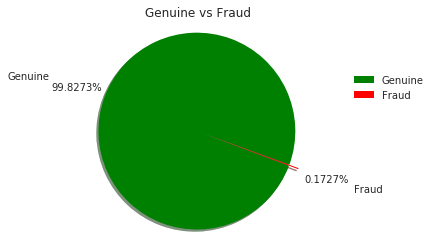

In [10]:
fig, ax = plt.subplots()

labels = ['Genuine','Fraud']
explode=(0.1,0)

cc_fraud = credit_card_data["Class"].value_counts()

df = pd.DataFrame({'labels': cc_fraud.index,
                   'values': cc_fraud.values
                  })
ax.pie(cc_fraud.values, explode=explode, labels=labels,  
       colors=['g','r'], autopct='%1.4f%%', 
       shadow=True, startangle=-20,   
       pctdistance=1.3,labeldistance=1.6)
ax.axis('equal')
ax.set_title("Genuine vs Fraud")
ax.legend(frameon=False, bbox_to_anchor=(1.2,0.8))

#### Inferences
- Imbalanced class distribution.
- The number of observations belonging to one class is significantly lower than those belonging to the other class.
- In this situation, the predictive model developed using conventional machine learning algorithms could be biased and inaccurate.

Challenges
- Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

## EDA - Exploratory data analysis


### Closer look - Time & Amount features
- Amount
- Time



#### Amount  & Time

In [11]:
credit_card_data[['Time','Amount']].describe()

Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000

#### Inferences

- On an average, credit card transaction is happening at **every 94813.86 seconds**.
- Average transaction amount is 88.35 with a standard deviation of 250, with a minimum amount of 0.0 and the maximum amount 25,691.16. 

### Scatter Plot (using pair ploting)
##### Check the skewness of Time & Amount variable (using pair plot)

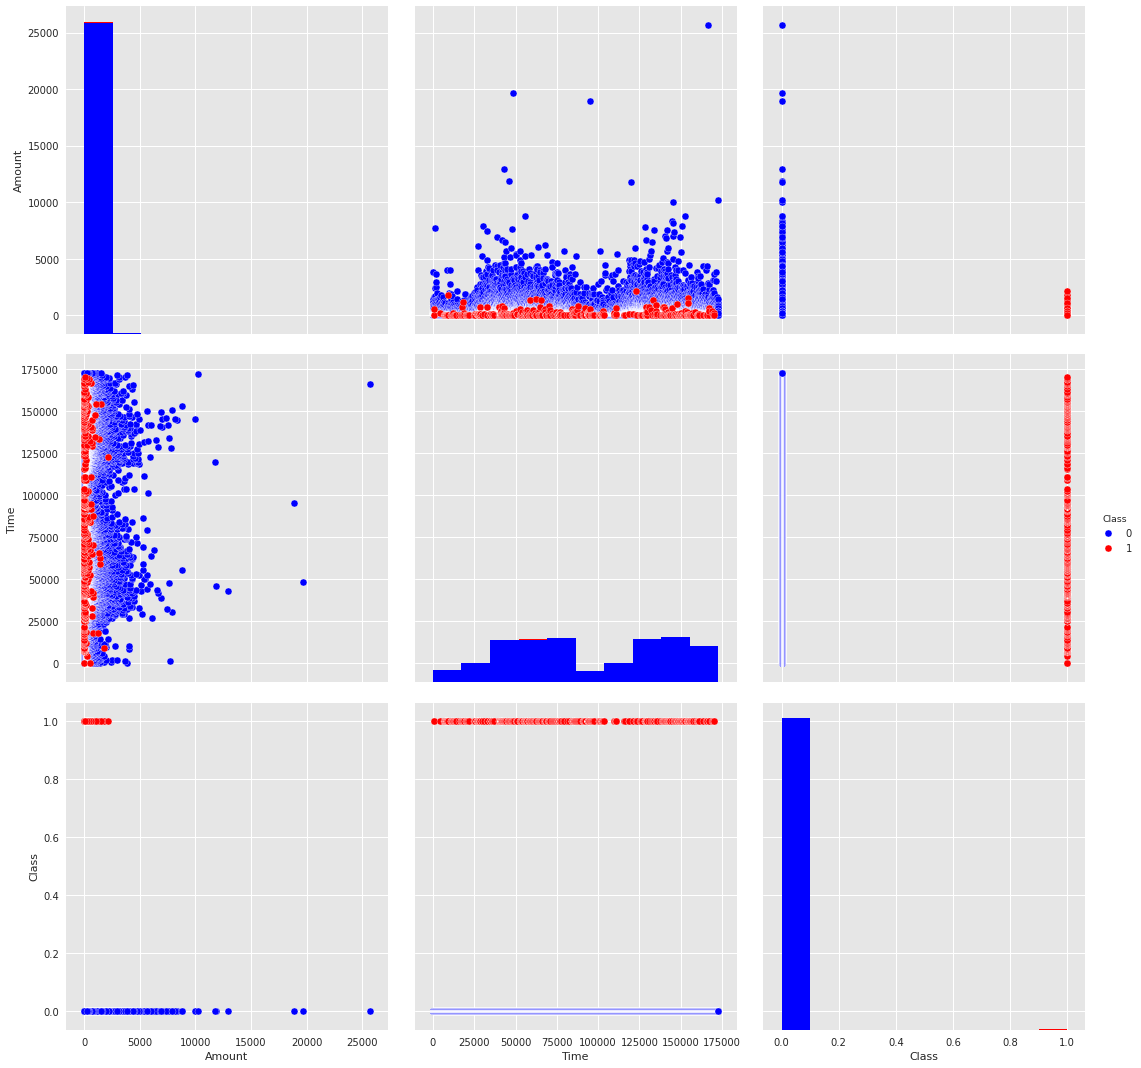

In [12]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
num_cols = credit_card_data[[ 'Amount','Time','Class']]
sns.pairplot(num_cols,hue="Class",palette=["b","r"],size=5)
plt.show()

#### Inferences

Time
- **Credit Card Transactions (Fraud vs Genuine) with Time (Graph 2,2)** - Fraudulent transactions have a **distribution more even** than valid transactions - are **equaly distributed in time**, including the low real transaction times, during night in Europe timezone
- The time elapsed for a fraud activity seems to be at the end of the dataset. However, this **Time variable does not seem of signiificance** as there does not seem to be a connect between fraud and time elapsed. **We can have more closer look later.**

Amount
- **Graph (1,2)**, it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 3000. Transactions which have transaction amount approximately above 3000 have no fraud.
- Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to **drop those outliers in our analysis** if they are just a few points that are very extreme.
- Most daily transactions are not extremely expensive, but it’s likely where most fraudulent transactions are occurring as well.


### Detailed Data Distibution Analysis

In [13]:
print("Maximum amount of Fraud transaction - ",credit_card_data[(credit_card_data['Class'] == 1)]['Amount'].max())
print("Maximum amount of Genuine transaction - ",credit_card_data[(credit_card_data['Class'] == 0)]['Amount'].max())

Maximum amount of Fraud transaction -  2125.87
Maximum amount of Genuine transaction -  25691.16


In [14]:
print("Fraud Transaction distribution : \n",credit_card_data[(credit_card_data['Class'] == 1)]['Amount'].value_counts().head())
print("\nGenuine Transaction distribution : \n",credit_card_data[(credit_card_data['Class'] == 0)]['Amount'].value_counts().head())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64

Genuine Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: Amount, dtype: int64


#### Inferences
- Maximum fraud transaction amount was 2125.87 and lowest was just 0.00.
- Genuine high value transaction are very less

### Amount

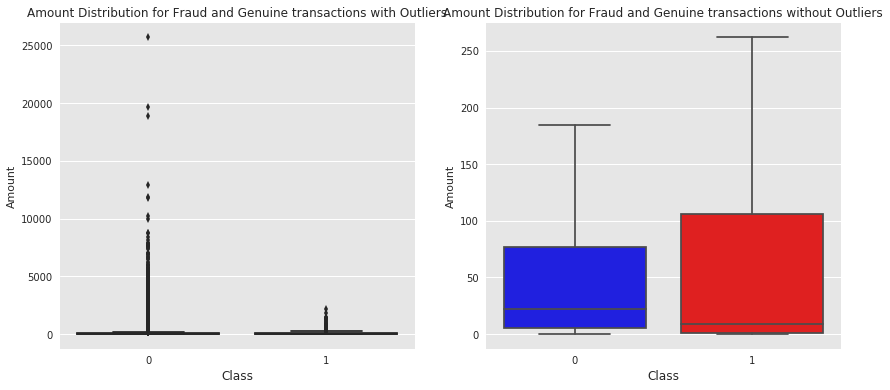

In [15]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'Amount', data = credit_card_data, palette=("g",'b'),showfliers=True)
plt.title('Amount Distribution for Fraud and Genuine transactions with Outliers',fontsize=12,family = "Comic Sans MS")
plt.xlabel('Class', fontsize=12,family = "Comic Sans MS")

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'Amount', data = credit_card_data, palette=("b",'r'),showfliers=False)
plt.title('Amount Distribution for Fraud and Genuine transactions without Outliers',fontsize=12,family = "Comic Sans MS")
plt.xlabel('Class', fontsize=12,family = "Comic Sans MS")
plt.show()

#### Inferences
- We have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme.
- **We should be conscious about that these outliers should not be the fraudulent transaction**

### Time 

In [16]:
# Converting time from second to hour
credit_card_data['Time_hr'] = credit_card_data['Time'].apply(lambda sec : (sec/3600))

In [17]:
# Calculating hour of the day
credit_card_data['Hour'] = credit_card_data['Time_hr']%24   # 2 days of data
credit_card_data['Hour'] = credit_card_data['Hour'].apply(lambda x : math.floor(x))

In [18]:
# Calculating First and Second day
credit_card_data['Day'] = credit_card_data['Time_hr']/24   # 2 days of data
credit_card_data['Day'] = credit_card_data['Day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [19]:
credit_card_data[['Time','Time_hr','Hour','Day','Amount','Class']].head(10)

Time   Time_hr  Hour  Day  Amount  Class
0   0.0  0.000000     0    1  149.62      0
1   0.0  0.000000     0    1    2.69      0
2   1.0  0.000278     0    1  378.66      0
3   1.0  0.000278     0    1  123.50      0
4   2.0  0.000556     0    1   69.99      0
5   2.0  0.000556     0    1    3.67      0
6   4.0  0.001111     0    1    4.99      0
7   7.0  0.001944     0    1   40.80      0
8   7.0  0.001944     0    1   93.20      0
9   9.0  0.002500     0    1    3.68      0

In [20]:
# calculating fraud transaction daywise
dayFrdTran = credit_card_data[(credit_card_data['Class'] == 1)]['Day'].value_counts()

# calculating genuine transaction daywise
dayGenuTran = credit_card_data[(credit_card_data['Class'] == 0)]['Day'].value_counts()

# calculating total transaction daywise
dayTran = credit_card_data['Day'].value_counts()

print("No of Transaction Day wise:")
print(dayTran)

print("\nNo of Fraud transaction Day wise:")
print(dayFrdTran)

print("\nNo of Genuine transactions Day wise:")
print(dayGenuTran)

print("\nPercentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

No of Transaction Day wise:
1    144787
2    140020
Name: Day, dtype: int64

No of Fraud transaction Day wise:
1    281
2    211
Name: Day, dtype: int64

No of Genuine transactions Day wise:
1    144506
2    139809
Name: Day, dtype: int64

Percentage of fraud transactions Day wise:
1    0.194078
2    0.150693
Name: Day, dtype: float64


#### Inferences

- Fraud transcation percentage is 0.19% on Day 1.

- Fraud transcation percentage is 0.15% on Day 2.

- Fraud transaction are more on Day 1 as compare to Day 2.

Let's see the above numbers in the graph.

### Day wise transcation distribution

Text(0.5, 0, 'Day')

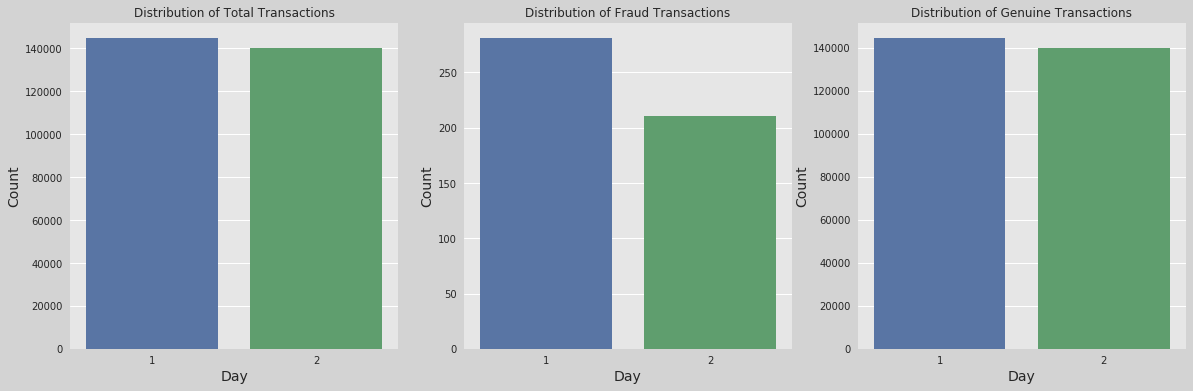

In [21]:
fig = plt.figure(figsize=(20, 6))
fig.set_facecolor("lightgrey")

plt.subplot(1,3,1)
sns.countplot(credit_card_data['Day'])
plt.title("Distribution of Total Transactions",fontsize=12,family = "Comic Sans MS")
plt.ylabel('Count', fontsize=14,family = "Comic Sans MS")
plt.xlabel('Day', fontsize=14,family = "Comic Sans MS")

plt.subplot(1,3,2)
sns.countplot(credit_card_data[(credit_card_data['Class'] == 1)]['Day'])
plt.title("Distribution of Fraud Transactions",fontsize=12,family = "Comic Sans MS")
plt.ylabel('Count', fontsize=14,family = "Comic Sans MS")
plt.xlabel('Day', fontsize=14,family = "Comic Sans MS")

plt.subplot(1,3,3)
sns.countplot(credit_card_data[(credit_card_data['Class'] == 0)]['Day'])
plt.title("Distribution of Genuine Transactions",fontsize=12,family = "Comic Sans MS")
plt.ylabel('Count', fontsize=14,family = "Comic Sans MS")
plt.xlabel('Day', fontsize=14,family = "Comic Sans MS")


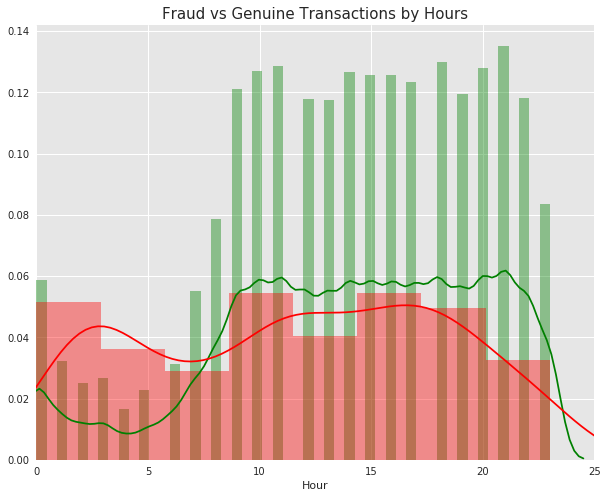

In [22]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Genuine Transactions

plt.figure(figsize=(10,8))

sns.distplot(credit_card_data[credit_card_data['Class'] == 0]["Hour"], color='green') # Genuine - green
sns.distplot(credit_card_data[credit_card_data['Class'] == 1]["Hour"], color='red') # Fraudulent - Red

plt.title('Fraud vs Genuine Transactions by Hours', fontsize=15)
plt.xlim([0,25])
plt.show()

#### Inferences
- Fraudulent transactions have a distribution even - are equaly distributed in time

### Corelation between V1-V14, Amount & Time features

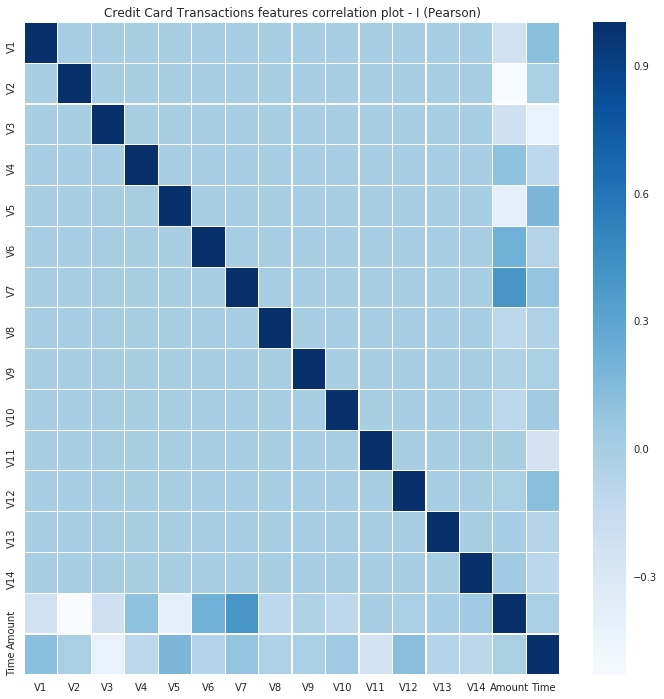

In [23]:
corr_one = credit_card_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 
                             'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'Amount', 'Time']]
plt.figure(figsize = (12,12))
plt.title('Credit Card Transactions features correlation plot - I (Pearson)')
corr = corr_one.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

#### Inferences

- **No correlation between features V1-V14** as they are the principal components obtained with PCA.
- Certainly there is some correlations between features & Time (**inverse correlation with V3**)
- Strong correlation between features & Amount (**direct correlation with V7 , inverse correlation with V1 and V5**).


### Corelation between V15-V28, Amount & Time features

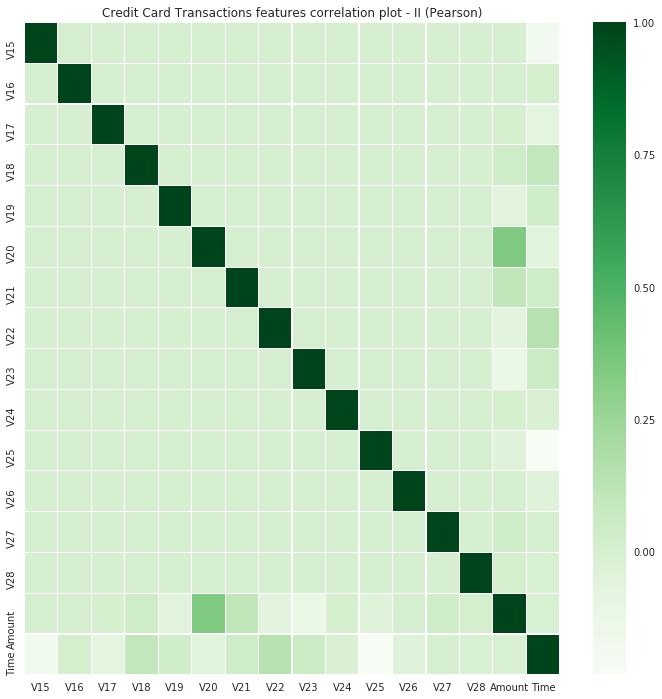

In [24]:
corr_one = credit_card_data[['V15','V16','V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 
                             'V26', 'V27','V28', 'Amount', 'Time']]
plt.figure(figsize = (12,12))
plt.title('Credit Card Transactions features correlation plot - II (Pearson)')
corr = corr_one.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

#### Inferences

- **No correlation between features V15-V28** as they are the principal components obtained with PCA.
- Strong correlation between features & Amount (**direct correlation with V22**).

Lets have a closure look on co-related variables.

### Closer look to correlated Variables V7 & V22

<Figure size 1008x432 with 0 Axes>

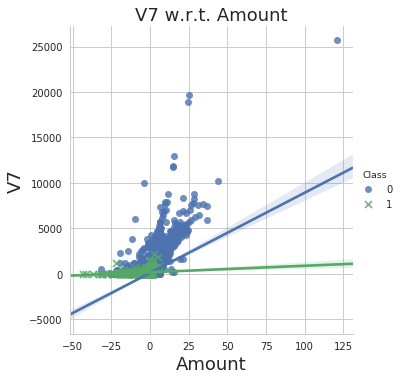

In [25]:
fig = plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
fig.set_facecolor("lightgrey")

sns.lmplot(x='V7', y='Amount',data=credit_card_data, hue='Class', fit_reg=True,markers=["o", "x"])
plt.ylabel("V7", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Amount', fontsize=18,family = "Comic Sans MS")
plt.title("V7 w.r.t. Amount", fontsize=18,family = "Comic Sans MS")

plt.show()

<Figure size 1440x576 with 0 Axes>

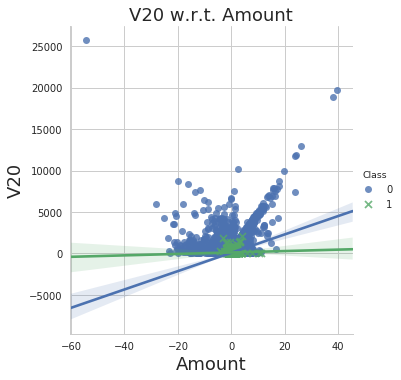

In [26]:
fig = plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
fig.set_facecolor("lightgrey")

sns.lmplot(x='V20', y='Amount',data=credit_card_data, hue='Class',markers=["o", "x"])
plt.ylabel("V20", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Amount', fontsize=18,family = "Comic Sans MS")
plt.title("V20 w.r.t. Amount", fontsize=18,family = "Comic Sans MS")
plt.show()

#### Inferences

- V22 and V7 features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).


### Closer look to correlated Variables V5 & V2

<Figure size 1440x576 with 0 Axes>

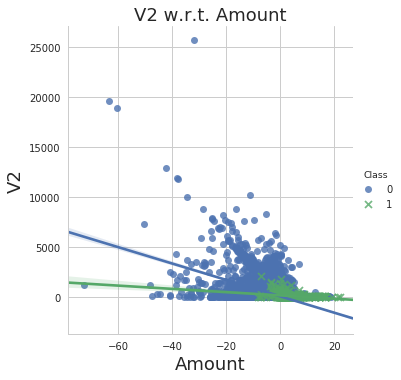

In [27]:
fig = plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
fig.set_facecolor("lightgrey")

sns.lmplot(x='V2', y='Amount',data=credit_card_data, hue='Class',markers=["o", "x"])
plt.ylabel("V2", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Amount', fontsize=18,family = "Comic Sans MS")
plt.title("V2 w.r.t. Amount", fontsize=18,family = "Comic Sans MS")
plt.show()

<Figure size 1440x576 with 0 Axes>

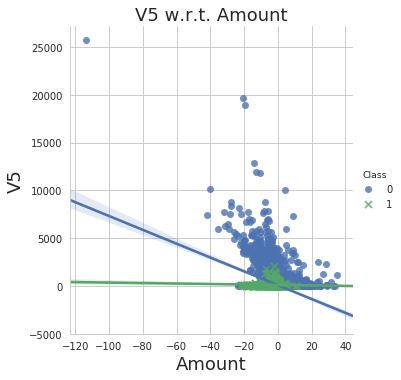

In [28]:
fig = plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
fig.set_facecolor("lightgrey")

sns.lmplot(x='V5', y='Amount',data=credit_card_data, hue='Class',markers=["o", "x"])
plt.ylabel("V5", fontsize=18,family = "Comic Sans MS")
plt.xlabel('Amount', fontsize=18,family = "Comic Sans MS")
plt.title("V5 w.r.t. Amount", fontsize=18,family = "Comic Sans MS")
plt.show()

#### Inferences

- V2 & V5 features are inverse correlated (**the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope**).

### Distribution of features based on Genuine or Fraud

In [29]:
def dist_Genuine_Vs_Fraud(colname):
    i = 0
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(22, 75))

    for feature in colname:
        i += 1
        plt.subplot(10,3,i)
        #Used divided sets for ploting the graphs.
        sns.kdeplot(genuine[feature], bw=0.5,label="Genuine")
        sns.kdeplot(fraud[feature], bw=0.5,label="Fraud")
        #Setting the y can x labels
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [30]:
# plotting kde plot from the dataset to see the skewness
col_name_num = ['V1', 'V2', 'V3','V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28','Amount','Time']

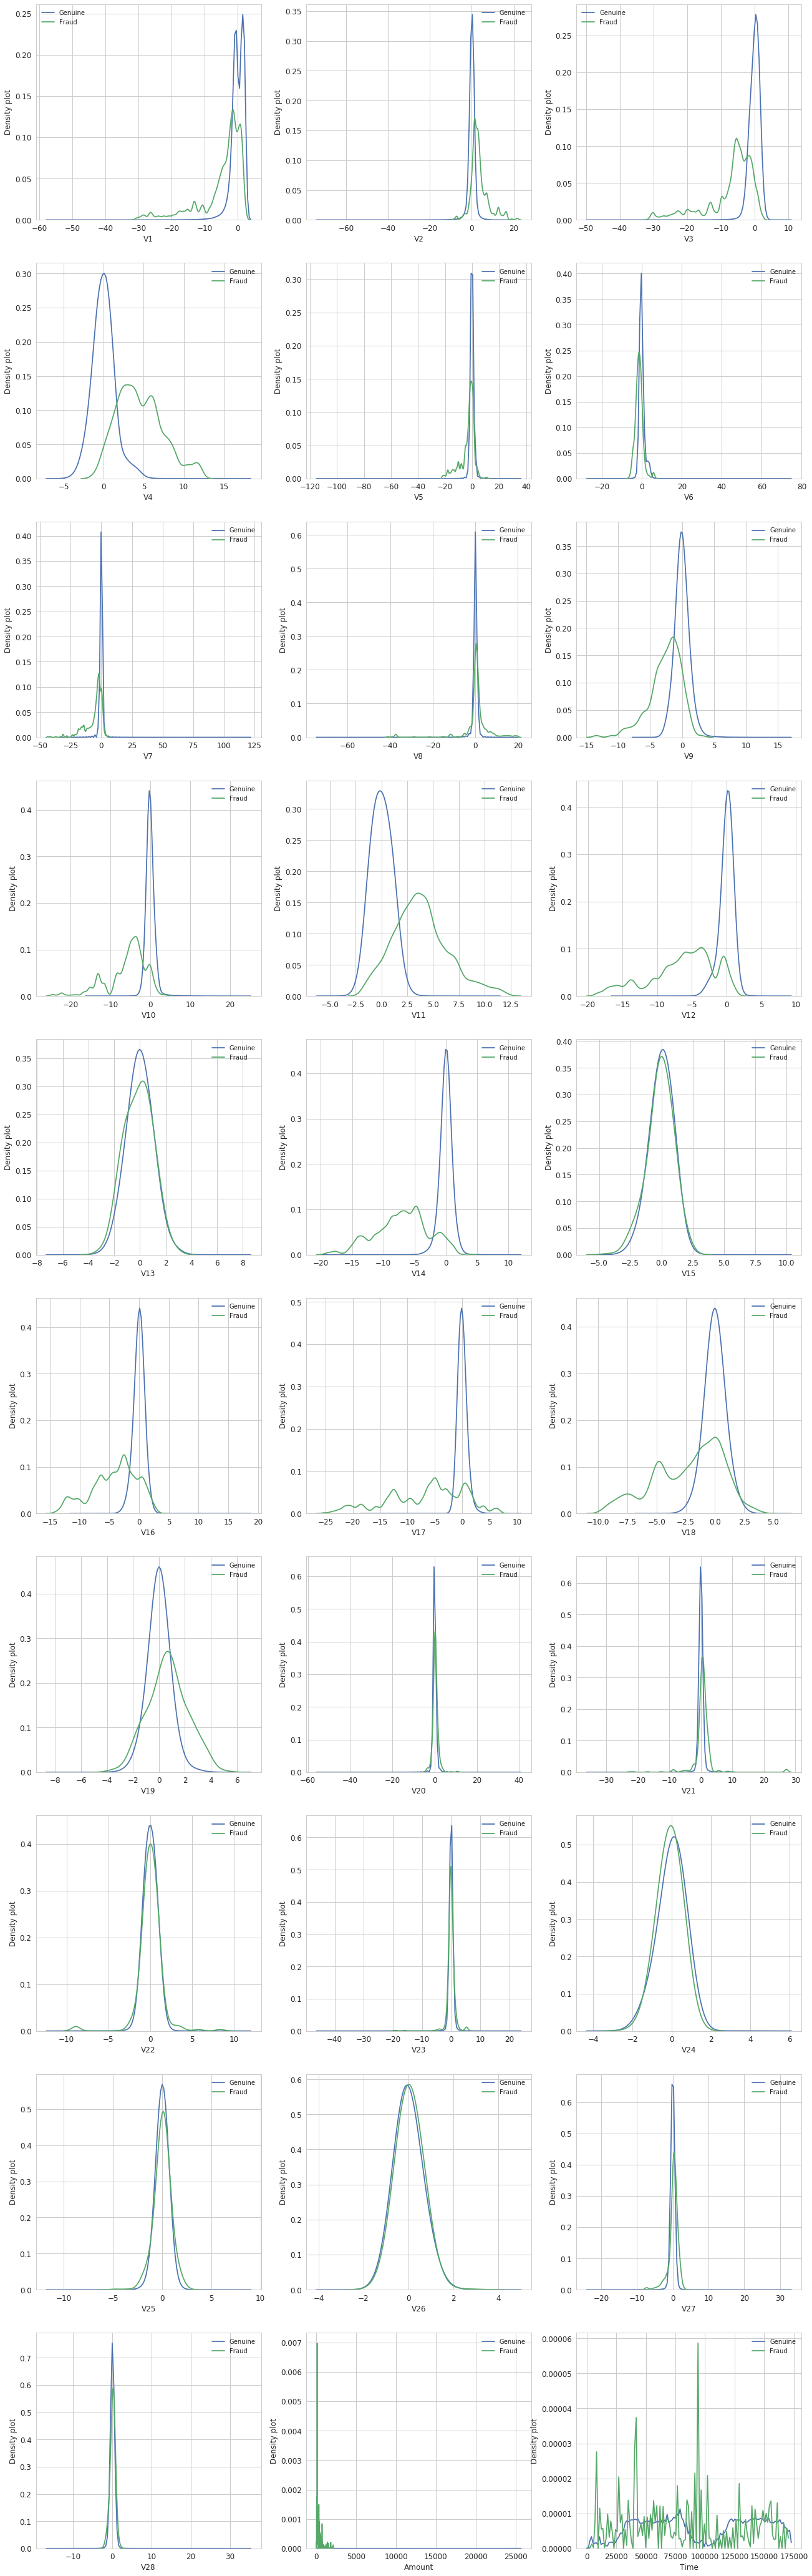

In [31]:
dist_Genuine_Vs_Fraud(col_name_num)

#### Inferences

- Features - V4, V11 have clearly separated distributions for Class values 0 and 1, 
- Features - V12, V14, V18 are partially separated distribution.
- Features - V25, V26, V28 have similar profiles for the two values of Class.
- There are few exceptions (Time and **Amount**), which need to be **mitigate**.
- The features distribution for genuine transactions (values of Class = 0) is centered around 0
- The feture distribution for fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.


### Scale Amount feature 
- Scale the data so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. 
- In addition, features having different unit should also be scaled thus providing each feature equal initial weightage.

This will result in a better prediction model.

In [32]:
# Recaling the Amount variable using Log, MinMax & Scalar and comparing them.

# Scale amount by log
credit_card_data['Amt_Log'] = np.log(credit_card_data.Amount + 0.01)

# object of the class StandardScaler ()
ss = StandardScaler() 
credit_card_data['Amt_Scaler'] = ss.fit_transform(credit_card_data['Amount'].values.reshape(-1,1))

# object of the class MinMaxScaler ()
mms = MinMaxScaler() 
credit_card_data['Amt_MinMax'] = mms.fit_transform(credit_card_data['Amount'].values.reshape(-1,1))

# object of the class RobustScaler ()
rs = RobustScaler() 
credit_card_data['Amt_Robust'] = rs.fit_transform(credit_card_data['Amount'].values.reshape(-1,1))

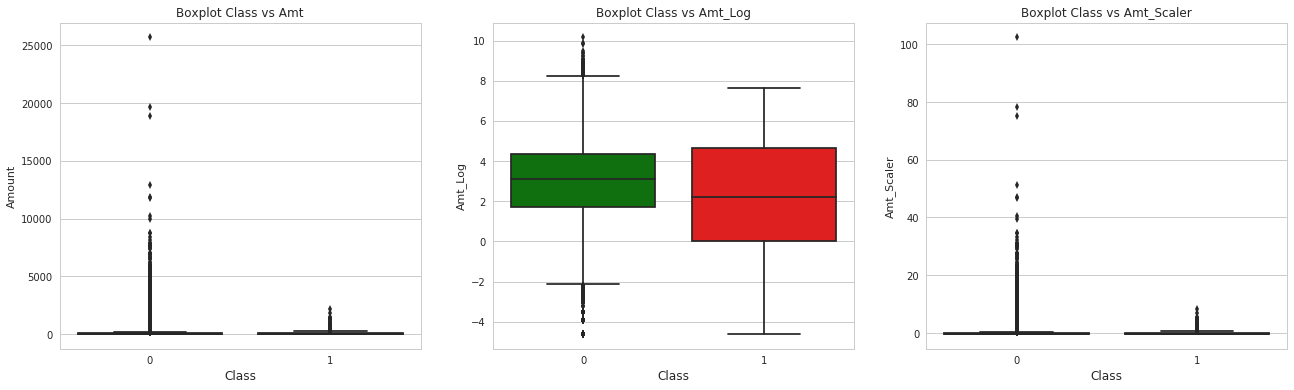

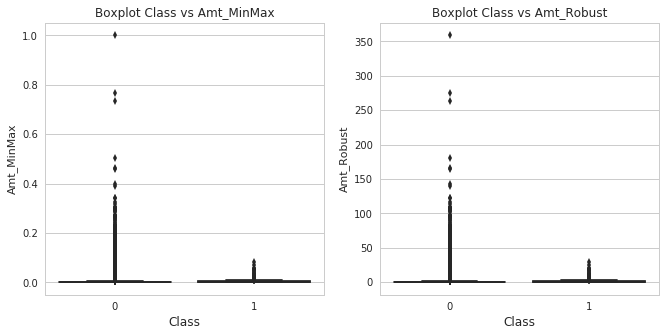

In [33]:
plt.figure(figsize=(22,6))

plt.subplot(1,3,1)
sns.boxplot(x = 'Class', y = 'Amount', data = credit_card_data, palette=("g",'b'),showfliers=True)
plt.title('Boxplot Class vs Amt',fontsize=12,family = "Comic Sans MS")
plt.xlabel('Class', fontsize=12,family = "Comic Sans MS")

plt.subplot(1,3,2)
sns.boxplot(x = 'Class', y = 'Amt_Log', data = credit_card_data, palette=("g",'r'),showfliers=True)
plt.title('Boxplot Class vs Amt_Log',fontsize=12,family = "Comic Sans MS")
plt.xlabel('Class', fontsize=12,family = "Comic Sans MS")

plt.subplot(1,3,3)
sns.boxplot(x = 'Class', y = 'Amt_Scaler', data = credit_card_data, palette=("g",'r'),showfliers=True)
plt.title('Boxplot Class vs Amt_Scaler',fontsize=12,family = "Comic Sans MS")
plt.xlabel('Class', fontsize=12,family = "Comic Sans MS")
plt.show()

plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'Class', y = 'Amt_MinMax', data = credit_card_data, palette=("g",'r'),showfliers=True)
plt.title('Boxplot Class vs Amt_MinMax',fontsize=12,family = "Comic Sans MS")
plt.xlabel('Class', fontsize=12,family = "Comic Sans MS")

plt.subplot(1,3,2)
sns.boxplot(x = 'Class', y = 'Amt_Robust', data = credit_card_data, palette=("g",'r'),showfliers=True)
plt.title('Boxplot Class vs Amt_Robust',fontsize=12,family = "Comic Sans MS")
plt.xlabel('Class', fontsize=12,family = "Comic Sans MS")

plt.show()

#### Inferences

- Slight difference in the log amount of our two Classes.
- The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have the highest values.
- By seeing the above graphs, Scaling the amount by log will best suit for our model.

### Copy of data set

In [34]:
credit_card_data_bkup = credit_card_data.copy()

In [35]:
credit_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_hr', 'Hour', 'Day', 'Amt_Log', 'Amt_Scaler',
       'Amt_MinMax', 'Amt_Robust'],
      dtype='object')

## Train & Test Split

### Separate Target Variable and Predictor Variables
- Removed unwanted features or columns

In [36]:
X = credit_card_data.drop(['Time','Class','Time_hr', 'Hour', 'Day','Amount', 'Amt_Scaler',
       'Amt_MinMax', 'Amt_Robust'],axis=1)
y = credit_card_data['Class']

In [37]:
X.rename(columns = {'Amt_Log':'Amount'}, inplace = True) 

In [38]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### Stratified split 
- It will ensure that test dataset has at least 100 records corresponding to the minority class

In [39]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, shuffle=True, random_state=101)
print(" Train Data Set \n\t",X_train.shape, "\n\t", y_train.shape)
print(" Test Data Set \n\t",X_test.shape, "\n\t", y_test.shape)

 Train Data Set 
	 (199364, 29) 
	 (199364,)
 Test Data Set 
	 (85443, 29) 
	 (85443,)


In [40]:
print(" \t Train Data set with Fraud and Genuine distribution ")
print(y_train.value_counts())
print("\n \t Test Data set with Fraud and Genuine distribution ")
print(y_test.value_counts())
print("\n \t Total Minority class data is \n ",np.sum(y))

 	 Train Data set with Fraud and Genuine distribution 
0    199020
1       344
Name: Class, dtype: int64

 	 Test Data set with Fraud and Genuine distribution 
0    85295
1      148
Name: Class, dtype: int64

 	 Total Minority class data is 
  492


#### Inferences 
- **Minority** class has **344 rows** in Train date set.
- **Minority** class has **148 rows** in Test date set.
- Total count of **Minority** class in Train and Test data set is **492**.
##### Preserve X_test & y_test to evaluate on the test data once you build the model

### Skewness

In [41]:
def distplot(df,colnames) :
    rows = math.ceil(len(colnames) / 3)
    fig = plt.figure(figsize=(30, 75))
    fig.set_facecolor("lightgrey")
    for i in range(0,len(colnames)):
        plt.subplot(rows,3,i+1)
        sns.distplot(df[str(colnames[i])],color='r')
        #str2 = colnames[i] + " :- Distribution plot for skewness"
        str2 = colnames[i] + " Skew: " + str(np.round(skew(df[colnames[i]]),2)) + "\n" + colnames[i] + " Kurtosis: " + str(np.round(kurtosis(df[colnames[i]]),2))
        #plt.title(cols[i] + 
        plt.title(str2, fontsize=12,family = "Comic Sans MS")
        plt.xlabel(colnames[i], fontsize=14,family = "Comic Sans MS")

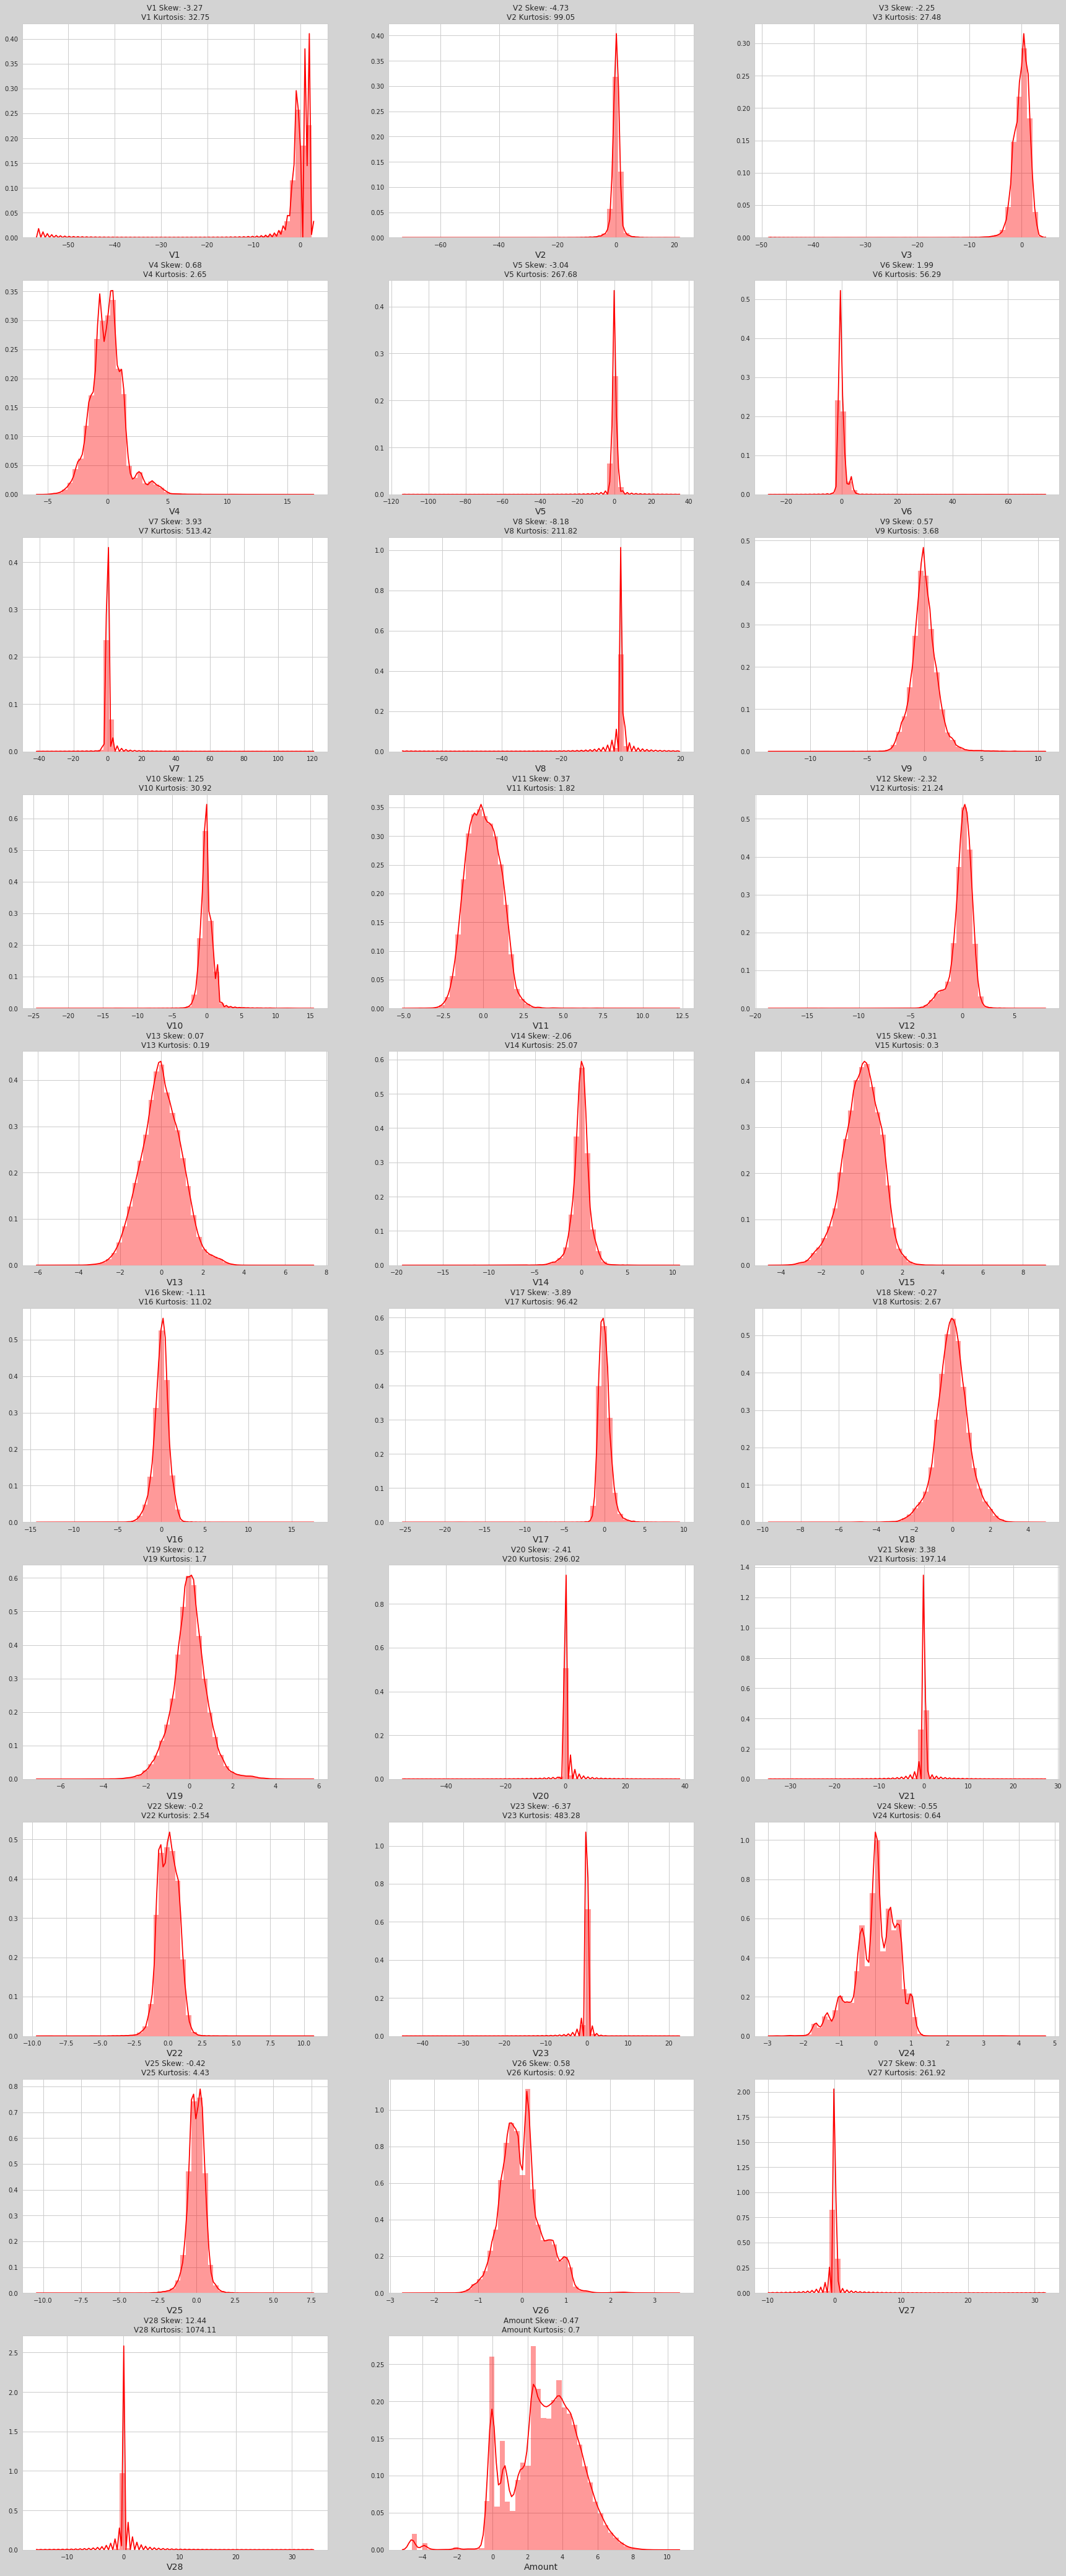

In [42]:
# plotting histograms from the dataset to see the skewness
col_name_skewness = X_train.columns
distplot(X_train,col_name_skewness)

#### Inferences
* Most of the variables are highly skewed.
* Applying PowerTransformer. We will use Yeo Johnson method instead of Box Cox Transformation in order to take care of negative values.

### Power Transfor using yeo-johnson Method

In [43]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[col_name_skewness] = pt.fit_transform(X_train[col_name_skewness])

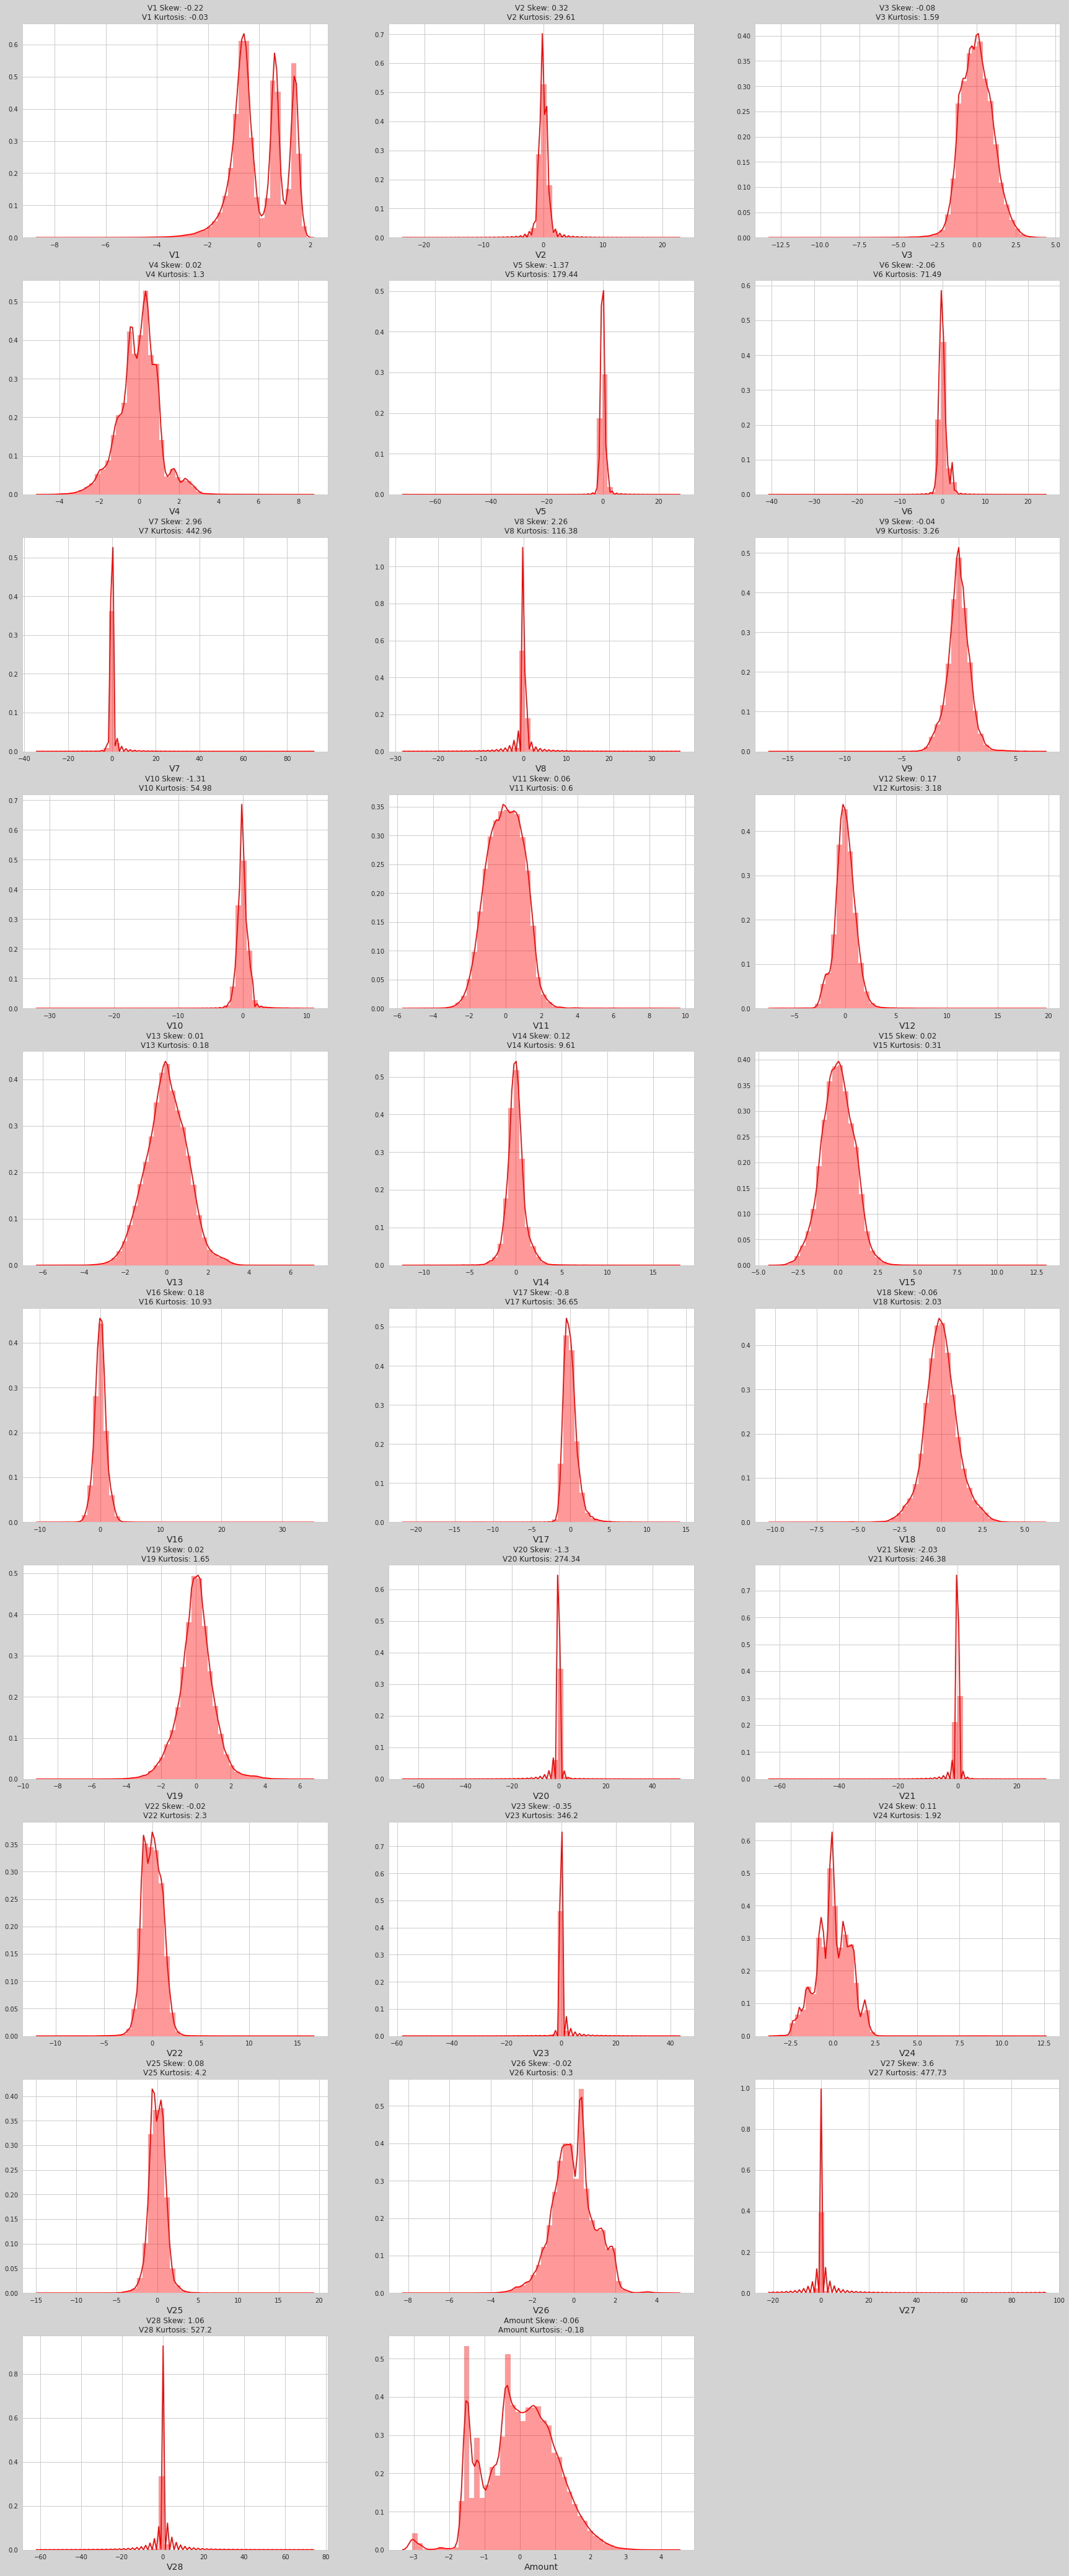

In [44]:
distplot(X_train,col_name_skewness)

### Utility variables for Model metrics (train and Test) & ROC curve 

In [45]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [46]:
# evaluate predictions on train subset
def modelMetrics_train(model, X_train, y_train):
    
    # use predict_proba for ROC_AUC
    y_pred = model.predict_proba(X_train)[:,1]
    
    roc = metrics.roc_auc_score(y_train, y_pred)
    print("Train AUC: %.2f%%" % (roc * 100.0))

    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Train ROC Curve Threshold: %.3f" % threshold)
    draw_roc(y_train, y_pred)
    
    print("Computing Predictions based on threshold value of ", threshold, " and then computing below metrics\n")

    y_pred_final = y_pred > threshold
    y_pred_final = y_pred_final.astype(int)

    print("Train Accuracy: ",metrics.accuracy_score(y_train, y_pred_final))
    print("Train Classification Report: \n", classification_report(y_train, y_pred_final))
    cm=confusion_matrix(y_train, y_pred_final)
    print("Train Confusion Matrix:\n",cm)
    return threshold

In [47]:
# evaluate predictions
def modelMetrics_test(model, threshold_train_val):
    # use predict_proba for ROC_AUC
    y_pred = model.predict_proba(X_test)[:,1]

    y_pred = y_pred > threshold_train_val
    y_pred = y_pred.astype(int)

    roc = metrics.roc_auc_score(y_test, y_pred)
    print("Test AUC: %.2f%%" % (roc * 100.0))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    draw_roc(y_test, y_pred)

    print("Accuracy on Test Dataset: ",metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    print("Confusion Matrix on Test Dataset:\n",cm)

In [48]:
def OptimalCutoff(y_pred_final,x1,y1):
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_pred_final[i]= y_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)

    # Calculating accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_pred_final.Fraud, y_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    print(cutoff_df)
    
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
    plt.vlines(x=x1,ymax=0.9,ymin=0.0,color="g",linestyles="--")
    plt.hlines(y=y1,xmax=0.9,xmin=0.0,color="b",linestyles="--")
    plt.show()

### Methods to mitigate class Imbalanced dataset treatment

- Undersampling
- Oversampling
- SMOTE
- Borderline SMOTE
- ADASYN

In [49]:
# Define the resampling method
ranundersam = RandomUnderSampler(random_state=0)
ranoversam = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)
adasyn = ADASYN(random_state=42)

In [50]:
# resample the training data
X_train_rus, y_train_rus = ranundersam.fit_sample(X_train,y_train)
X_train_ros, y_train_ros = ranoversam.fit_sample(X_train,y_train)
X_train_sm, y_train_sm = smote.fit_sample(X_train,y_train)
X_train_blsm, y_train_blsm = borderlinesmote.fit_sample(X_train,y_train)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [51]:
print('Resampled dataset shape using Random Under sample -  %s' % Counter(y_train_rus))
print('Resampled dataset shape using Random over sample - %s' % Counter(y_train_ros))
print('Resampled dataset shape using SMOTE - %s' % Counter(y_train_sm))
print('Resampled dataset shape using Border line SMOTE - %s' % Counter(y_train_blsm))
print('Resampled dataset shape using Adasyn - %s' % Counter(y_train_adasyn))

Resampled dataset shape using Random Under sample -  Counter({0: 344, 1: 344})
Resampled dataset shape using Random over sample - Counter({0: 199020, 1: 199020})
Resampled dataset shape using SMOTE - Counter({0: 199020, 1: 199020})
Resampled dataset shape using Border line SMOTE - Counter({0: 199020, 1: 199020})
Resampled dataset shape using Adasyn - Counter({1: 199039, 0: 199020})


## Model Building & Hyperparameter tuning


##### For the prediction of Fraud customers we will be fitting variety of models with imblanced and balanced data set and select one which is the best predictor of Fraud. 

- Different models on the **imbalanced** & **balanced** dataset and see the result
  - Logistic Regression
  - Random Forest
  - Decision Tree
  - XGBoost

### Logistic on Imbalanced Data set

In [ ]:
lr_imbal =LogisticRegression(random_state=42)

In [ ]:
lr_imbal.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 97.89%
Train ROC Curve Threshold: 0.003


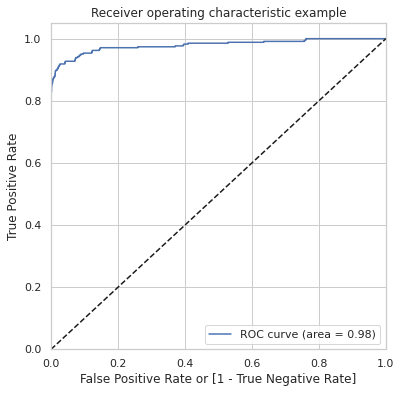

Computing Predictions based on threshold value of  0.0025211776920613074  and then computing below metrics

Train Accuracy:  0.973390381412893
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    199020
           1       0.06      0.92      0.11       344

    accuracy                           0.97    199364
   macro avg       0.53      0.94      0.55    199364
weighted avg       1.00      0.97      0.98    199364

Train Confusion Matrix:
 [[193744   5276]
 [    29    315]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(lr_imbal, X_train, y_train)

Test AUC: 93.78%


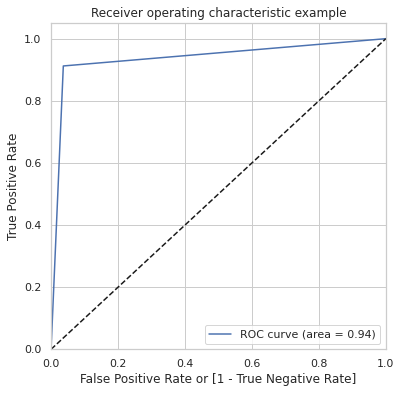

Accuracy on Test Dataset:  0.9633439837084372
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.91      0.08       148

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443

Confusion Matrix on Test Dataset:
 [[82176  3119]
 [   13   135]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(lr_imbal, threshold_train_val)

In [ ]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
lr_imbal_hp = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr_imbal_hp, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train, y_train), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.0s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fcfc0e4b518>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal score and hyperparameters
print('Best score ',grid_search.best_score_,'using',grid_search.best_params_)

Best score  0.977924372048785 using {'C': 0.01, 'penalty': 'l2'}


In [ ]:
# model with the best hyperparameters
lr_imbal_hp = LogisticRegression(C=0.01, penalty='l2',solver='liblinear', random_state=42)
lr_imbal_hp.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 98.12%
Train ROC Curve Threshold: 0.007


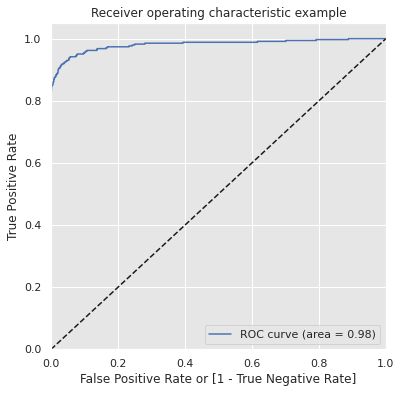

Computing Predictions based on threshold value of  0.00693385081174166  and then computing below metrics

Train Accuracy:  0.9672809534319134
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    199020
           1       0.05      0.92      0.09       344

    accuracy                           0.97    199364
   macro avg       0.52      0.94      0.54    199364
weighted avg       1.00      0.97      0.98    199364

Train Confusion Matrix:
 [[192526   6494]
 [    29    315]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(lr_imbal_hp, X_train, y_train)

Test AUC: 93.87%


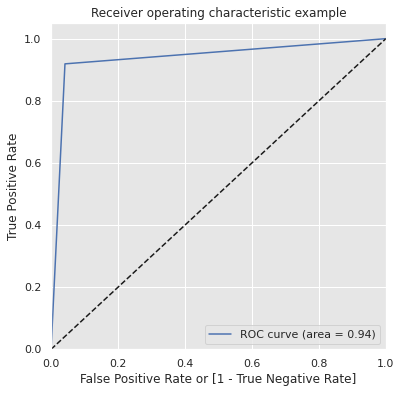

Accuracy on Test Dataset:  0.9584401296770947
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.92      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.96      0.98     85443

Confusion Matrix on Test Dataset:
 [[81756  3539]
 [   12   136]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(lr_imbal_hp, threshold_train_val)

### Logistic on balanced data set using Random Oversampling

In [ ]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
lr_bal_hp = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr_bal_hp, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train_ros, y_train_ros), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [ ]:
grid_search.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   37.8s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fcfc10bce08>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal score and hyperparameters
print('Best score ',grid_search.best_score_,'using',grid_search.best_params_)

Best score  0.985388853831165 using {'C': 100, 'penalty': 'l2'}


In [ ]:
# model with the best hyperparameters
lr_bal_hp_ros = LogisticRegression(C=100, penalty='l2', solver='liblinear',random_state=42)
lr_bal_hp_ros.fit(X_train_ros, y_train_ros)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 98.54%
Train ROC Curve Threshold: 0.471


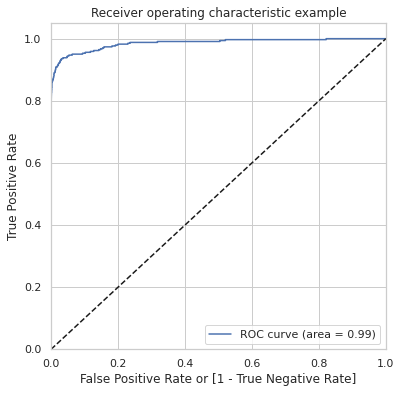

Computing Predictions based on threshold value of  0.4708870022543899  and then computing below metrics

Train Accuracy:  0.9508315747161089
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040

Train Confusion Matrix:
 [[192880   6140]
 [ 13431 185589]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(lr_bal_hp_ros, X_train_ros, y_train_ros)

Test AUC: 93.98%


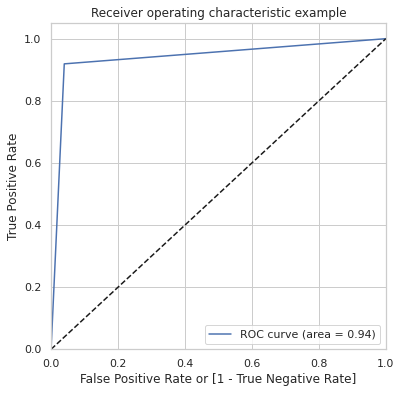

Accuracy on Test Dataset:  0.960511686153342
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.92      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443

Confusion Matrix on Test Dataset:
 [[81933  3362]
 [   12   136]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(lr_bal_hp_ros, threshold_train_val)

### Logistic on balanced data set using SMOTE

In [ ]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
lr_bal_hp = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr_bal_hp, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train_sm, y_train_sm), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [ ]:
grid_search.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   38.3s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fcfc10b7308>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal score and hyperparameters
print('Best score ',grid_search.best_score_,'using',grid_search.best_params_)

Best score  0.9883340285800584 using {'C': 100, 'penalty': 'l2'}


In [ ]:
# model with the best hyperparameters
lr_bal_sm = LogisticRegression(C=100, penalty='l2',solver='liblinear', random_state=42)
lr_bal_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 98.83%
Train ROC Curve Threshold: 0.454


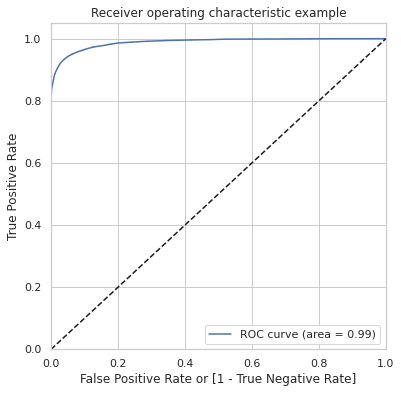

Computing Predictions based on threshold value of  0.4536749549626253  and then computing below metrics

Train Accuracy:  0.9473444879911567
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95    199020
           1       0.96      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040

Train Confusion Matrix:
 [[191981   7039]
 [ 13920 185100]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(lr_bal_sm, X_train_sm, y_train_sm)

Test AUC: 93.68%


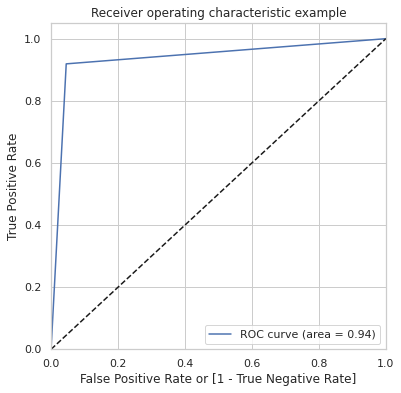

Accuracy on Test Dataset:  0.9546832391184766
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.92      0.07       148

    accuracy                           0.95     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.95      0.98     85443

Confusion Matrix on Test Dataset:
 [[81435  3860]
 [   12   136]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(lr_bal_sm, threshold_train_val)

### Logistic on balanced data set using Border line SMOTE

In [ ]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
lr_bal_hp = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr_bal_hp, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train_blsm, y_train_blsm), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [ ]:
grid_search.fit(X_train_blsm, y_train_blsm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.6s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fcfc0cdb518>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal score and hyperparameters
print('Best score ',grid_search.best_score_,'using',grid_search.best_params_)

Best score  0.9989111305986208 using {'C': 10, 'penalty': 'l2'}


In [ ]:
# model with the best hyperparameters
lr_bal_blsm = LogisticRegression(C=10, penalty='l2',solver='liblinear', random_state=42)
lr_bal_blsm.fit(X_train_blsm, y_train_blsm)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 99.90%
Train ROC Curve Threshold: 0.417


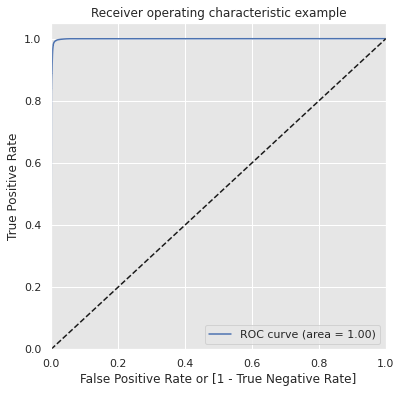

Computing Predictions based on threshold value of  0.4173423836541517  and then computing below metrics

Train Accuracy:  0.9901241081298362
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    199020
           1       0.99      0.99      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040

Train Confusion Matrix:
 [[196692   2328]
 [  1603 197417]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(lr_bal_blsm, X_train_blsm, y_train_blsm)

Test AUC: 94.13%


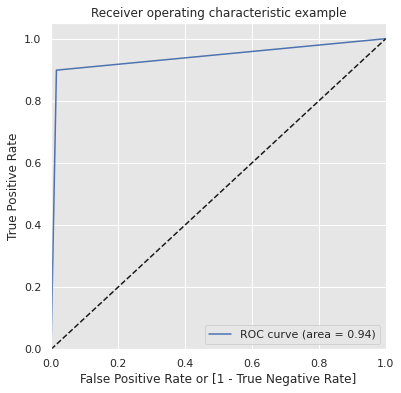

Accuracy on Test Dataset:  0.9838722891284248
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.09      0.90      0.16       148

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.58     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix on Test Dataset:
 [[83932  1363]
 [   15   133]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(lr_bal_blsm, threshold_train_val)

### Logistic on balanced data set using ADASYN

In [ ]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
lr_bal_hp = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr_bal_hp, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train_adasyn, y_train_adasyn), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [ ]:
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   38.2s finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fcfc08dfdb0>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal score and hyperparameters
print('Best score ',grid_search.best_score_,'using',grid_search.best_params_)

Best score  0.9474515379534267 using {'C': 100, 'penalty': 'l2'}


In [ ]:
# model with the best hyperparameters
lr_bal_adasyn = LogisticRegression(C=100, penalty='l2',solver='liblinear', random_state=42)
lr_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 96.23%
Train ROC Curve Threshold: 0.323


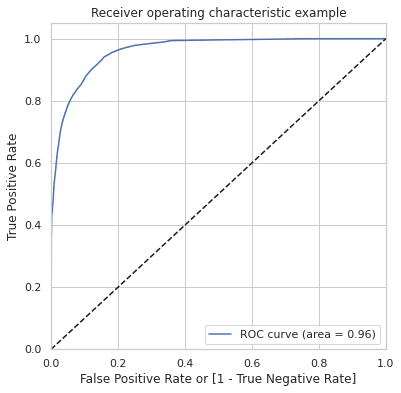

Computing Predictions based on threshold value of  0.3229102287417265  and then computing below metrics

Train Accuracy:  0.8913954966474819
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.84      0.89    199020
           1       0.86      0.94      0.90    199039

    accuracy                           0.89    398059
   macro avg       0.90      0.89      0.89    398059
weighted avg       0.90      0.89      0.89    398059

Train Confusion Matrix:
 [[167793  31227]
 [ 12004 187035]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(lr_bal_adasyn, X_train_adasyn, y_train_adasyn)

Test AUC: 92.64%


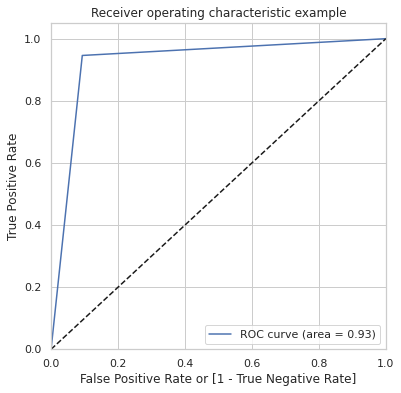

Accuracy on Test Dataset:  0.9068267734044919
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85295
           1       0.02      0.95      0.03       148

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Confusion Matrix on Test Dataset:
 [[77342  7953]
 [    8   140]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(lr_bal_adasyn, threshold_train_val)

#### Inferences 

| Model                | Train Dataset       | Hyperparameters              | Train AUC   | Threshold | Test AUC |
| :-------------       | :-------------      | :----------:                 | -----------: | -----------: | -----------: |
|  Logistic Regression |  Imbalanced         | Default                      | 97.89%   | 0.003 | 93.78% |
|  Logistic Regression |  Imbalanced         | {'C': 0.01, 'penalty': 'l2'} | 98.12%   | 0.007 | 93.87% |
|  Logistic Regression |  Random Oversampler | {'C': 100, 'penalty': 'l2'}  | 98.54%   | 0.471 | 93.98% |
|  Logistic Regression |  SMOTE              | {'C': 100, 'penalty': 'l2'}  | 98.83%   | 0.454 | 93.86% |
|  Logistic Regression |  Border line SMOTE  | {'C': 10, 'penalty': 'l2'}  | 99.90%   | 0.417 | 94.12% |
|  Logistic Regression |  ADASYN             | {'C': 100, 'penalty': 'l2'}  | 96.23%   | 0.325 | 92.65% |

### K-Nearest Neighbours

In [ ]:
knn_dt=KNeighborsClassifier()
knn_dt.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(knn_dt, X_train, y_train)

In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(knn_dt, threshold_train_val)

In [ ]:
k_range = list(range(1,8,2))
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(knn, X_train, y_train)

In [ ]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(knn, threshold_train_val)

### Utility functions used for Random Forest

In [53]:
def rf_tuning_max_depth(X_train, y_train):
    # Tuning max_depth parameters to build the model on
    parameters = {'max_depth': range(2, 20, 5)}

    # instantiate the model
    rf = RandomForestClassifier()

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    scores = rf.cv_results_
    
    fig = plt.figure(figsize=(25,20))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_max_depth"],scores["mean_train_score"], label="Training roc_auc")
    plt.plot(scores["param_max_depth"],scores["mean_test_score"], label="Test roc_auc")
    plt.xlabel("max_depth",fontsize=12,family = "Comic Sans MS")
    plt.ylabel("roc_auc", fontsize=12,family = "Comic Sans MS")
    plt.legend()
    plt.show()

In [54]:
def rf_tuning_n_estimators(X_train, y_train):
    #Tuning n_estimators parameters to build the model on
    parameters = {'n_estimators': range(100, 300, 100)}

    # instantiate the model
    rf = RandomForestClassifier(max_depth=4)

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    # scores of GridSearch CV
    scores = rf.cv_results_

    fig = plt.figure(figsize=(25,20))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    # plotting accuracies with n_estimators
    plt.figure()
    plt.plot(scores["param_n_estimators"],scores["mean_train_score"], label="Training roc_auc")
    plt.plot(scores["param_n_estimators"],scores["mean_test_score"], label="Test roc_auc")
    plt.xlabel("n_estimators",fontsize=12,family = "Comic Sans MS")
    plt.ylabel("roc_auc", fontsize=12,family = "Comic Sans MS")
    plt.legend()
    plt.show()

In [55]:
def rf_tuning_max_features(X_train, y_train):
    #Tuning max_features parameters to build the model on
    parameters = {'max_features': [2, 4, 8, 10]}

    # instantiate the model
    rf = RandomForestClassifier(max_depth=4)

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    # scores of GridSearch CV
    scores = rf.cv_results_
    
    fig = plt.figure(figsize=(25,20))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    # plotting roc_auc with max_features
    plt.figure()
    plt.plot(scores["param_max_features"],scores["mean_train_score"], label="Training roc_auc")
    plt.plot(scores["param_max_features"],scores["mean_test_score"], label="Test roc_auc")
    plt.xlabel("max_features",fontsize=12,family = "Comic Sans MS")
    plt.ylabel("roc_auc", fontsize=12,family = "Comic Sans MS")
    plt.legend()
    plt.show()

In [56]:
def rf_tuning_min_samples_leaf(X_train, y_train):
    # Tuning min_samples_leaf parameters to build the model on
    parameters = {'min_samples_leaf': range(100, 400, 50)}

    # instantiate the model
    rf = RandomForestClassifier(max_depth=4)

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    # scores of GridSearch CV
    scores = rf.cv_results_

    fig = plt.figure(figsize=(25,20))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    # plotting roc_auc with min_samples_leaf
    plt.figure()
    plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"], label="Training roc_auc")
    plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"], label="Test roc_auc")
    plt.xlabel("min_samples_leaf",fontsize=12,family = "Comic Sans MS")
    plt.ylabel("roc_auc", fontsize=12,family = "Comic Sans MS")
    plt.legend()
    plt.show()

In [57]:
def rf_tuning_min_samples_split(X_train, y_train):
    # Tuning min_samples_split parameters to build the model on
    parameters = {'min_samples_split': range(200, 500, 50)}

    # instantiate the model
    rf = RandomForestClassifier(max_depth=4)

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    # scores of GridSearch CV
    scores = rf.cv_results_

    fig = plt.figure(figsize=(25,20))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    # plotting roc_auc with min_samples_split
    plt.figure()
    plt.plot(scores["param_min_samples_split"],scores["mean_train_score"], label="Training roc_auc")
    plt.plot(scores["param_min_samples_split"],scores["mean_test_score"], label="Test roc_auc")
    plt.xlabel("min_samples_split",fontsize=12,family = "Comic Sans MS")
    plt.ylabel("roc_auc", fontsize=12,family = "Comic Sans MS")
    plt.legend()
    plt.show()

### Random Forest Classifier on imbalanced data set

In [ ]:
# Running the random forest with default parameters.
rfc_imbal = RandomForestClassifier(random_state=42)
rfc_imbal.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.530


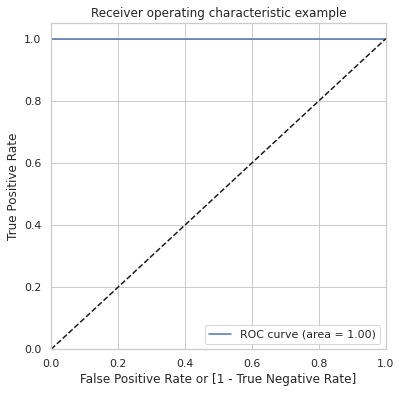

Computing Predictions based on threshold value of  0.53  and then computing below metrics

Train Accuracy:  0.9999849521478301
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      0.99      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

Train Confusion Matrix:
 [[199020      0]
 [     3    341]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc_imbal, X_train, y_train)

Test AUC: 90.87%


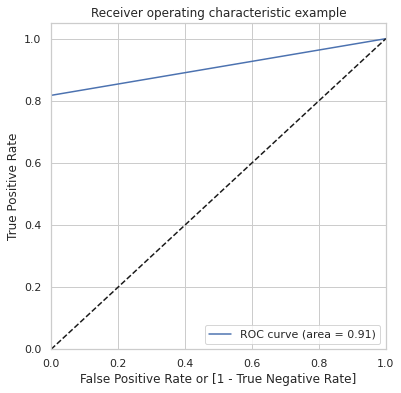

Accuracy on Test Dataset:  0.9994382219725431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.82      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85274    21]
 [   27   121]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc_imbal, threshold_train_val)

<Figure size 1800x1440 with 0 Axes>

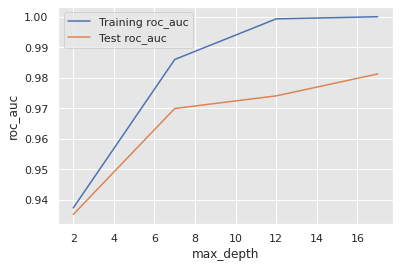

In [ ]:
rf_tuning_max_depth(X_train, y_train)

<Figure size 1800x1440 with 0 Axes>

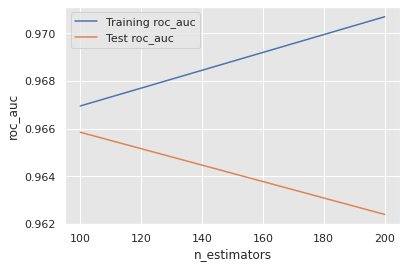

In [ ]:
rf_tuning_n_estimators(X_train, y_train)

<Figure size 1800x1440 with 0 Axes>

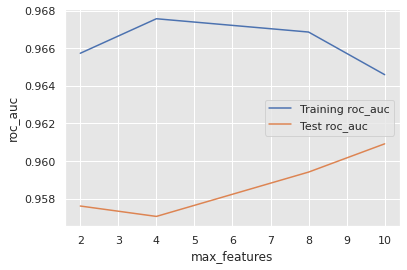

In [ ]:
rf_tuning_max_features(X_train, y_train)

<Figure size 1800x1440 with 0 Axes>

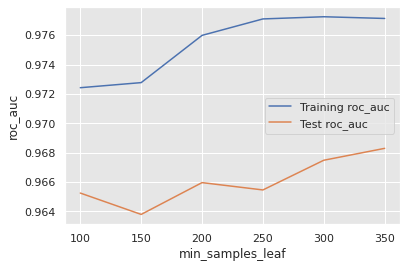

In [ ]:
rf_tuning_min_samples_leaf(X_train, y_train)

<Figure size 1800x1440 with 0 Axes>

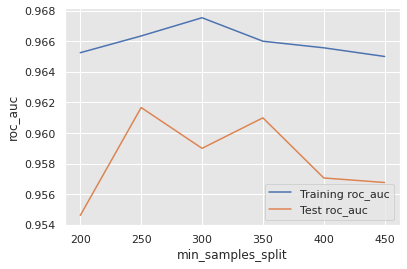

In [ ]:
rf_tuning_min_samples_split(X_train, y_train)

##### Grid Search to Find Optimal Hyperparameters

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7],
    'min_samples_leaf': [150,200],
    'min_samples_split': [250,350],
    'n_estimators': [150, 160], 
    'max_features': [4,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train, y_train), 
                  scoring="roc_auc",
                  return_train_score=True, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 59.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 135.5min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fcfc20e1e08>,
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight...n_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_scor

In [ ]:
# printing the optimal  score and hyperparameters
print('Best score ',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9755168221771763 using {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 350, 'n_estimators': 150}


In [ ]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=350,
                             max_features=8,
                             n_estimators=150)

In [ ]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=350,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train AUC: 98.89%
Train ROC Curve Threshold: 0.002


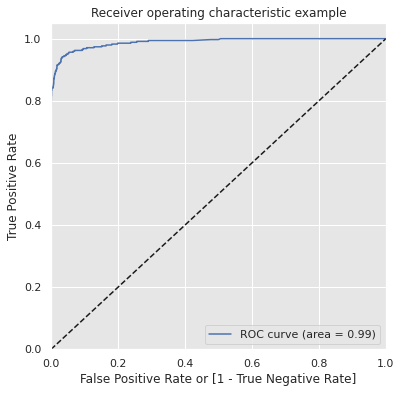

Computing Predictions based on threshold value of  0.0017094770305304359  and then computing below metrics

Train Accuracy:  0.9664483056118457
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    199020
           1       0.05      0.94      0.09       344

    accuracy                           0.97    199364
   macro avg       0.52      0.95      0.54    199364
weighted avg       1.00      0.97      0.98    199364

Train Confusion Matrix:
 [[192352   6668]
 [    21    323]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc, X_train, y_train)

Test AUC: 91.19%


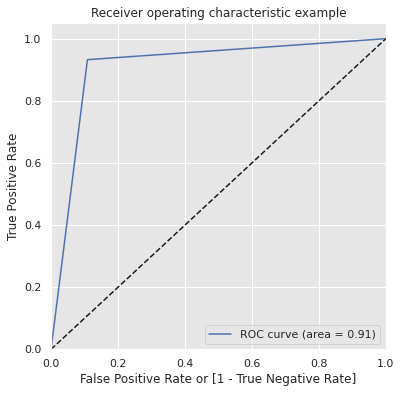

Accuracy on Test Dataset:  0.8914598036117646
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     85295
           1       0.01      0.93      0.03       148

    accuracy                           0.89     85443
   macro avg       0.51      0.91      0.49     85443
weighted avg       1.00      0.89      0.94     85443

Confusion Matrix on Test Dataset:
 [[76031  9264]
 [   10   138]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc, threshold_train_val)

### Random Forest on balanced data set using Random Oversampling

In [ ]:
# Running the random forest with default parameters.
rfc_bal_ros = RandomForestClassifier(random_state=42)
rfc_bal_ros.fit(X_train_ros,y_train_ros)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Train AUC: 100.00%
Train ROC Curve Threshold: 1.000


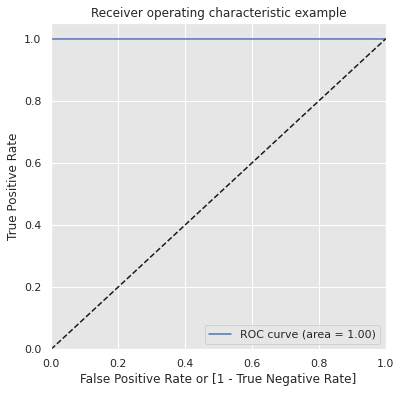

Computing Predictions based on threshold value of  1.0  and then computing below metrics

Train Accuracy:  0.5
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67    199020
           1       0.00      0.00      0.00    199020

    accuracy                           0.50    398040
   macro avg       0.25      0.50      0.33    398040
weighted avg       0.25      0.50      0.33    398040

Train Confusion Matrix:
 [[199020      0]
 [199020      0]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc_bal_ros, X_train_ros, y_train_ros)

Test AUC: 50.00%


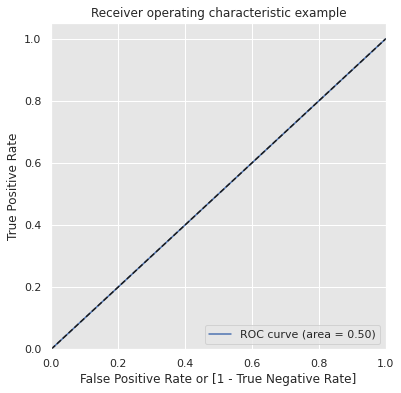

Accuracy on Test Dataset:  0.9982678510820079
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85295     0]
 [  148     0]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc_bal_ros, threshold_train_val)

<Figure size 1800x1440 with 0 Axes>

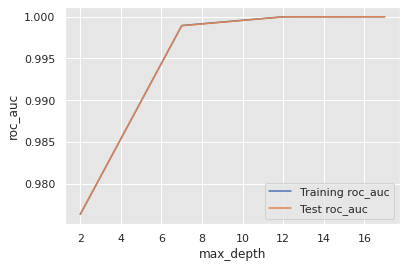

In [ ]:
rf_tuning_max_depth(X_train_ros, y_train_ros)

<Figure size 1800x1440 with 0 Axes>

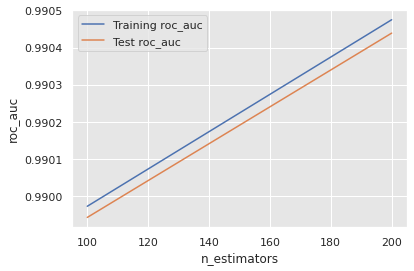

In [ ]:
rf_tuning_n_estimators(X_train_ros, y_train_ros)

<Figure size 1800x1440 with 0 Axes>

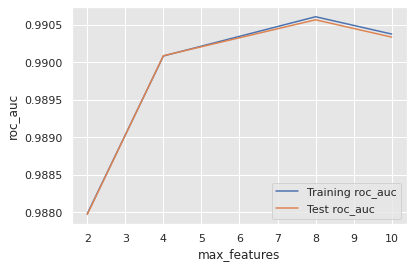

In [ ]:
rf_tuning_max_features(X_train_ros, y_train_ros)

<Figure size 1800x1440 with 0 Axes>

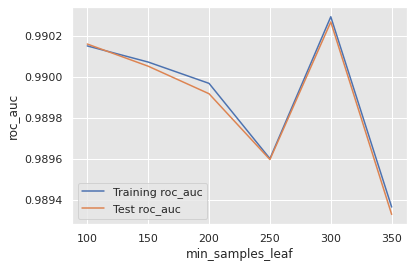

In [ ]:
rf_tuning_min_samples_leaf(X_train_ros, y_train_ros)

<Figure size 1800x1440 with 0 Axes>

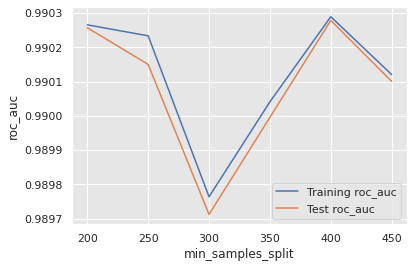

In [ ]:
rf_tuning_min_samples_split(X_train_ros, y_train_ros)

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid_ros = {
    'max_depth': [12],
    'min_samples_leaf': [300],
    'min_samples_split': [250,400],
    'n_estimators': [200], 
    'max_features': [8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid_ros, 
                          cv=StratifiedKFold(5).split(X_train_ros, y_train_ros), 
                  scoring="roc_auc",
                  return_train_score=True, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 47.6min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f8162274a40>,
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob

In [ ]:
# printing the optimal  score and hyperparameters
print('Best Score of',grid_search.best_score_,'using',grid_search.best_params_)

Best Score of 0.9999351567177209 using {'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 300, 'min_samples_split': 400, 'n_estimators': 200}


In [58]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=300, 
                             min_samples_split=400,
                             max_features=8,
                             n_estimators=200)

In [59]:
                            
# fit
rfc.fit(X_train_ros,y_train_ros)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train AUC: 99.99%
Train ROC Curve Threshold: 0.612


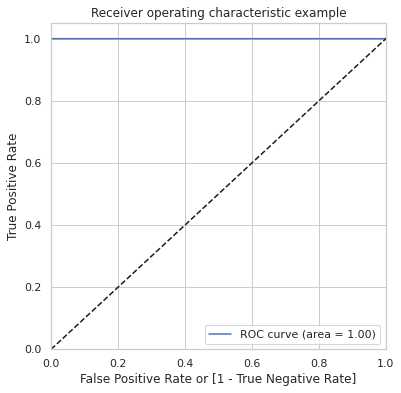

Computing Predictions based on threshold value of  0.612414596056055  and then computing below metrics

Train Accuracy:  0.9980353733293137
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Train Confusion Matrix:
 [[198832    188]
 [   594 198426]]


In [60]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc, X_train_ros, y_train_ros)

Test AUC: 93.52%


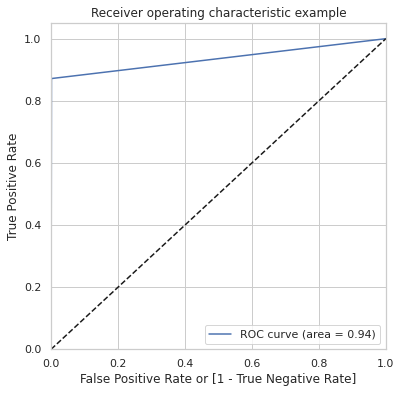

Accuracy on Test Dataset:  0.9985955549313578
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.56      0.87      0.68       148

    accuracy                           1.00     85443
   macro avg       0.78      0.94      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85194   101]
 [   19   129]]


In [61]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc, threshold_train_val)

### Random Forest on balanced data set using SMOTE


In [ ]:
# Running the random forest with default parameters.
rfc_bal_sm = RandomForestClassifier(random_state=42)
rfc_bal_sm.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.810


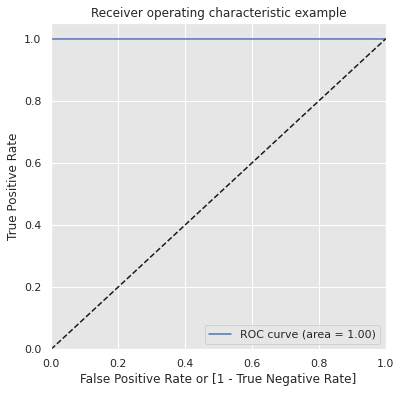

Computing Predictions based on threshold value of  0.81  and then computing below metrics

Train Accuracy:  0.9999949753793589
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Train Confusion Matrix:
 [[199020      0]
 [     2 199018]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc_bal_sm, X_train_sm, y_train_sm)

Test AUC: 63.17%


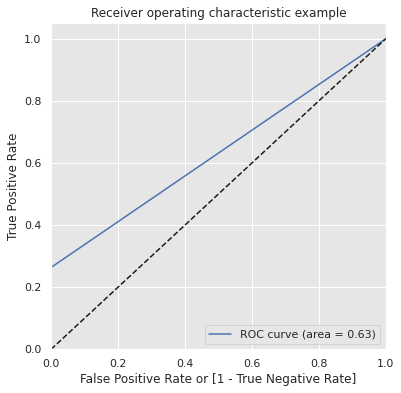

Accuracy on Test Dataset:  0.9986774808936952
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.26      0.41       148

    accuracy                           1.00     85443
   macro avg       0.95      0.63      0.70     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85291     4]
 [  109    39]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc_bal_sm, threshold_train_val)

<Figure size 1800x1440 with 0 Axes>

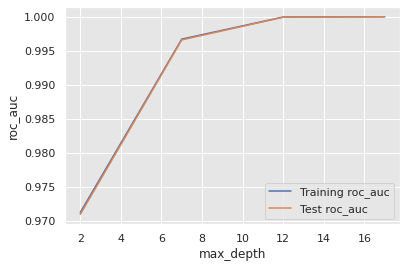

In [ ]:
rf_tuning_max_depth(X_train_sm, y_train_sm)

<Figure size 1800x1440 with 0 Axes>

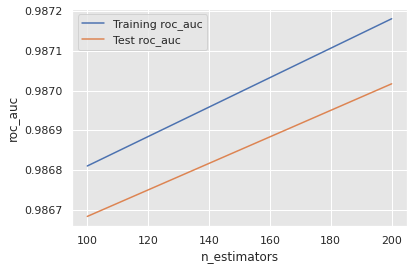

In [ ]:
rf_tuning_n_estimators(X_train_sm, y_train_sm)

<Figure size 1800x1440 with 0 Axes>

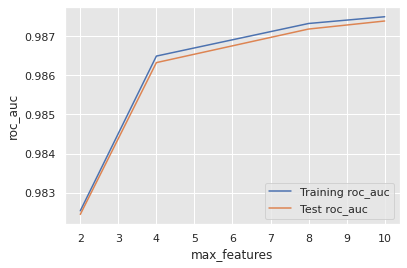

In [ ]:
rf_tuning_max_features(X_train_sm, y_train_sm)

<Figure size 1800x1440 with 0 Axes>

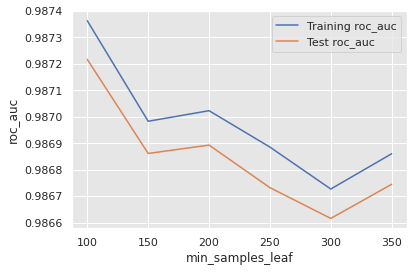

In [ ]:
rf_tuning_min_samples_leaf(X_train_sm, y_train_sm)

<Figure size 1800x1440 with 0 Axes>

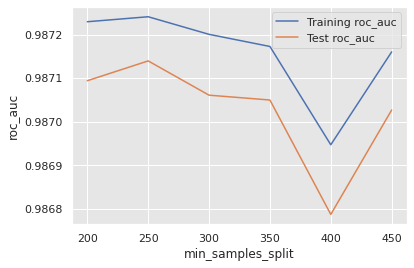

In [72]:
rf_tuning_min_samples_split(X_train_sm, y_train_sm)

In [75]:
# Create the parameter grid based on the results of random search 
param_grid_ros = {
    'max_depth': [12],
    'min_samples_leaf': [300],
    'min_samples_split': [250,400],
    'n_estimators': [200], 
    'max_features': [8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid_ros, 
                          cv=StratifiedKFold(5).split(X_train_sm, y_train_sm), 
                  scoring="roc_auc",
                  return_train_score=True, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_sm, y_train_sm)

In [ ]:
# printing the optimal  score and hyperparameters
print('Best Score ',grid_search.best_score_,'using',grid_search.best_params_)

In [96]:
# model with the best hyperparameters
rfc_sm = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=200)

In [97]:
# fit
rfc_sm.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train AUC: 99.67%
Train ROC Curve Threshold: 0.374


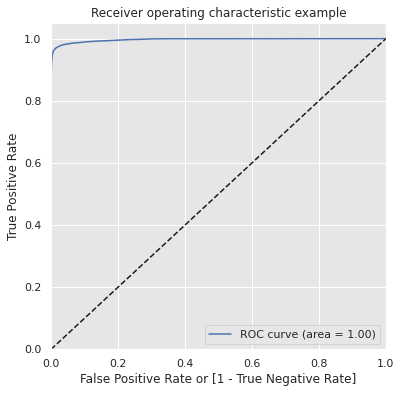

Computing Predictions based on threshold value of  0.3744064696541551  and then computing below metrics

Train Accuracy:  0.9777710782835896
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    199020
           1       0.99      0.97      0.98    199020

    accuracy                           0.98    398040
   macro avg       0.98      0.98      0.98    398040
weighted avg       0.98      0.98      0.98    398040

Train Confusion Matrix:
 [[196218   2802]
 [  6046 192974]]


In [98]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc_sm, X_train_sm, y_train_sm)

Test AUC: 93.96%


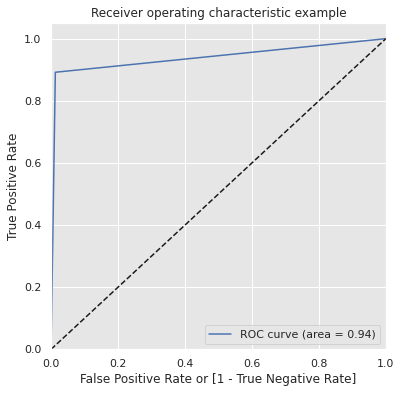

Accuracy on Test Dataset:  0.9871142164952074
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.11      0.89      0.19       148

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.59     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix on Test Dataset:
 [[84210  1085]
 [   16   132]]


In [99]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc_sm, threshold_train_val)

### Random Forest on balanced data set using Border line SMOTE

In [ ]:
# Running the random forest with default parameters.
rfc_bal_blsm = RandomForestClassifier(random_state=42)
rfc_bal_blsm.fit(X_train_blsm,y_train_blsm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.530


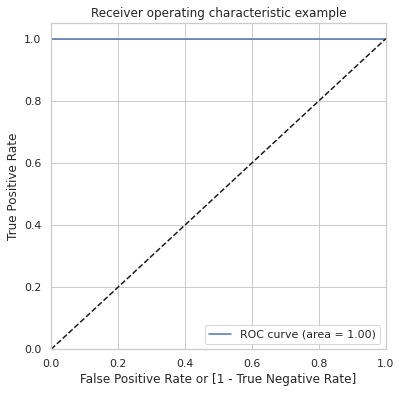

Computing Predictions based on threshold value of  0.53  and then computing below metrics

Train Accuracy:  0.9999974876896794
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Train Confusion Matrix:
 [[199020      0]
 [     1 199019]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc_bal_blsm, X_train_blsm, y_train_blsm)

Test AUC: 85.13%


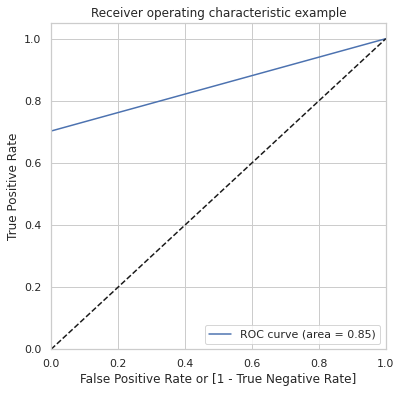

Accuracy on Test Dataset:  0.9993328885923949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.70      0.78       148

    accuracy                           1.00     85443
   macro avg       0.94      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85282    13]
 [   44   104]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc_bal_blsm, threshold_train_val)

<Figure size 1800x1440 with 0 Axes>

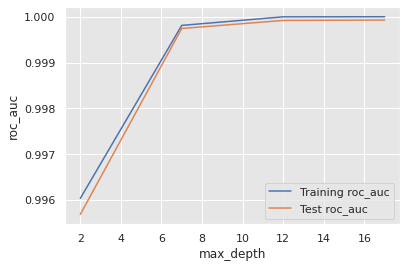

In [ ]:
rf_tuning_max_depth(X_train_blsm, y_train_blsm)

<Figure size 1800x1440 with 0 Axes>

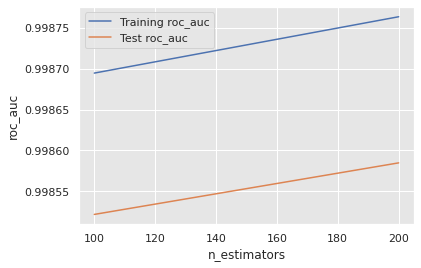

In [ ]:
rf_tuning_n_estimators(X_train_blsm, y_train_blsm)

<Figure size 1800x1440 with 0 Axes>

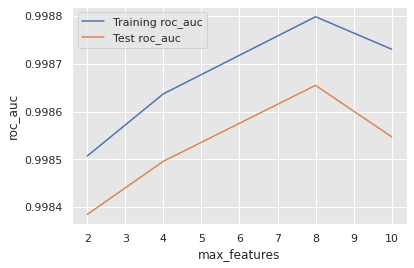

In [ ]:
rf_tuning_max_features(X_train_blsm, y_train_blsm)

<Figure size 1800x1440 with 0 Axes>

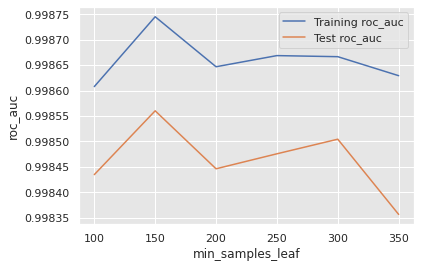

In [ ]:
rf_tuning_min_samples_leaf(X_train_blsm, y_train_blsm)

<Figure size 1800x1440 with 0 Axes>

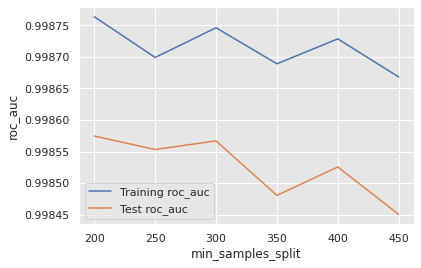

In [ ]:
rf_tuning_min_samples_split(X_train_blsm, y_train_blsm)

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid_ros = {
    'max_depth': [7],
    'min_samples_leaf': [150,200],
    'min_samples_split': [200,300],
    'n_estimators': [200], 
    'max_features': [8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid_ros, 
                          cv=StratifiedKFold(5).split(X_train_blsm, y_train_blsm), 
                  scoring="roc_auc",
                  return_train_score=True, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_blsm, y_train_blsm)

In [ ]:
# printing the optimal  score and hyperparameters
print('Best score ',grid_search.best_score_,'using',grid_search.best_params_)

In [62]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=200)

In [63]:
# fit
rfc.fit(X_train_blsm,y_train_blsm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train AUC: 99.98%
Train ROC Curve Threshold: 0.481


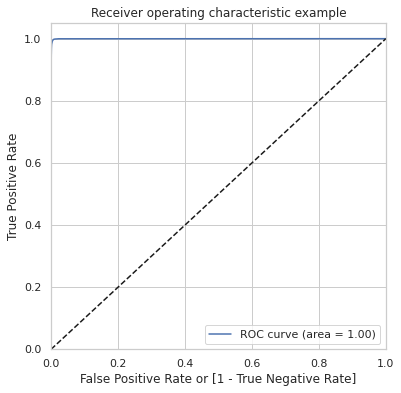

Computing Predictions based on threshold value of  0.48131671858097425  and then computing below metrics

Train Accuracy:  0.99515877801226
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    199020
           1       0.99      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Train Confusion Matrix:
 [[197640   1380]
 [   547 198473]]


In [64]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc, X_train_blsm, y_train_blsm)

Test AUC: 93.87%


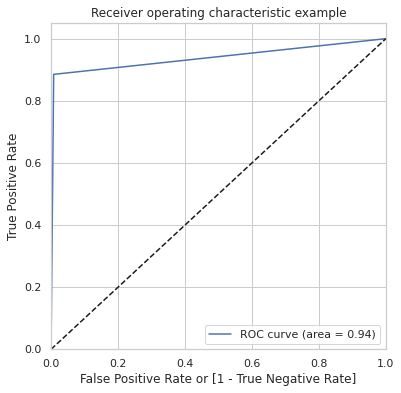

Accuracy on Test Dataset:  0.9920765890710767
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.17      0.89      0.28       148

    accuracy                           0.99     85443
   macro avg       0.58      0.94      0.64     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix on Test Dataset:
 [[84635   660]
 [   17   131]]


In [65]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc, threshold_train_val)

### Random Forest on balanced data set using ADASYN

In [ ]:
# Running the random forest with default parameters.
rfc_bal_adasyn = RandomForestClassifier(random_state=42)
rfc_bal_adasyn.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.820


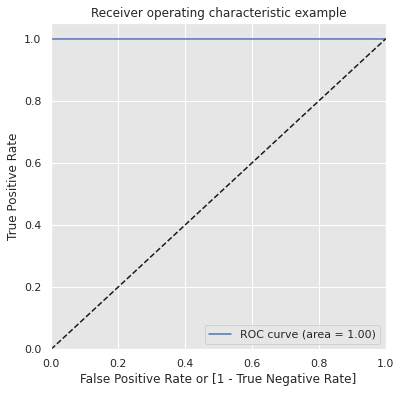

Computing Predictions based on threshold value of  0.82  and then computing below metrics

Train Accuracy:  0.9999974878095961
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199039

    accuracy                           1.00    398059
   macro avg       1.00      1.00      1.00    398059
weighted avg       1.00      1.00      1.00    398059

Train Confusion Matrix:
 [[199020      0]
 [     1 199038]]


In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc_bal_adasyn, X_train_adasyn, y_train_adasyn)

Test AUC: 57.77%


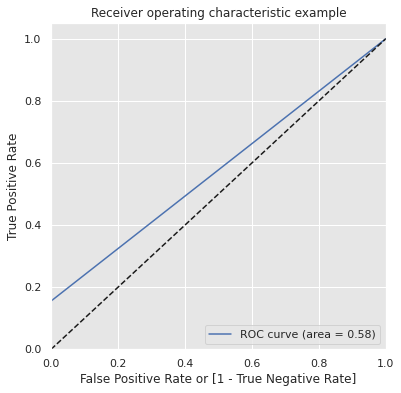

Accuracy on Test Dataset:  0.9984902215512096
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.16      0.26       148

    accuracy                           1.00     85443
   macro avg       0.93      0.58      0.63     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85291     4]
 [  125    23]]


In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc_bal_adasyn, threshold_train_val)

<Figure size 1800x1440 with 0 Axes>

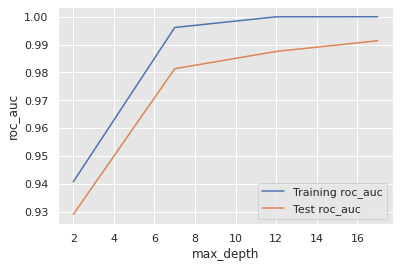

In [ ]:
rf_tuning_max_depth(X_train_adasyn, y_train_adasyn)

<Figure size 1800x1440 with 0 Axes>

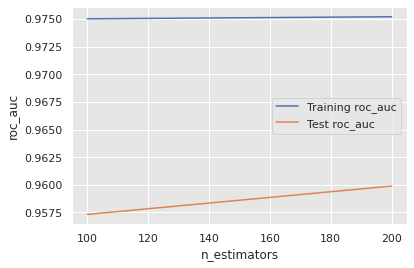

In [ ]:
rf_tuning_n_estimators(X_train_adasyn, y_train_adasyn)

<Figure size 1800x1440 with 0 Axes>

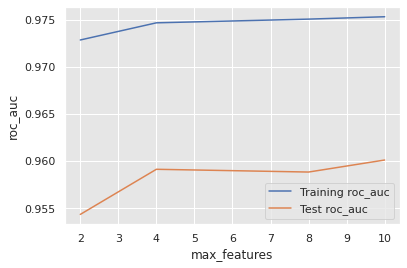

In [ ]:
rf_tuning_max_features(X_train_adasyn, y_train_adasyn)

<Figure size 1800x1440 with 0 Axes>

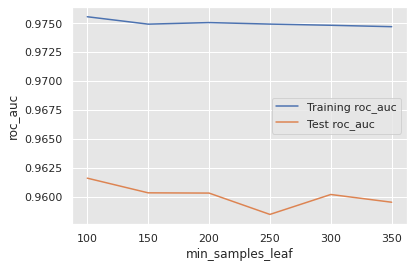

In [ ]:
rf_tuning_min_samples_leaf(X_train_adasyn, y_train_adasyn)

<Figure size 1800x1440 with 0 Axes>

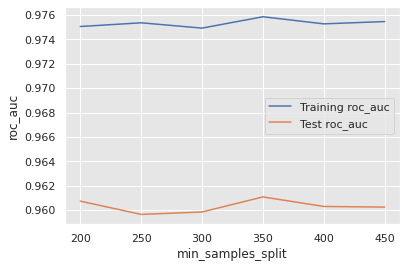

In [ ]:
rf_tuning_min_samples_split(X_train_adasyn, y_train_adasyn)

In [74]:
param_grid = {
    'max_depth': [7],
    'min_samples_leaf': [100,150],
    'min_samples_split': [350],
    'n_estimators': [200], 
    'max_features': [4]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_adasyn, y_train_adasyn), 
                  scoring="roc_auc",
                  return_train_score=True, n_jobs = -1,verbose = 1)

In [ ]:
grid_search.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
print('Best score ',grid_search.best_score_,'using',grid_search.best_params_)

In [78]:
# model with the best hyperparameters
rfc_adasyn = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=8,
                             n_estimators=200)

In [79]:
# fit
rfc_adasyn.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train AUC: 99.57%
Train ROC Curve Threshold: 0.432


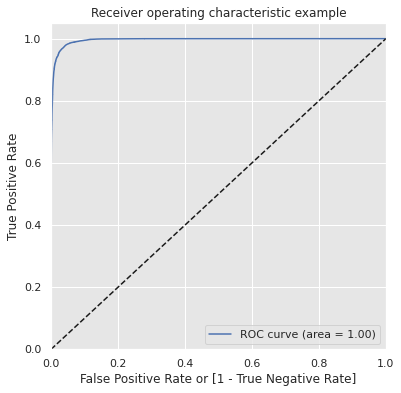

Computing Predictions based on threshold value of  0.4324289114734481  and then computing below metrics

Train Accuracy:  0.9677937190215521
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97    199020
           1       0.96      0.98      0.97    199039

    accuracy                           0.97    398059
   macro avg       0.97      0.97      0.97    398059
weighted avg       0.97      0.97      0.97    398059

Train Confusion Matrix:
 [[190387   8633]
 [  4187 194852]]


In [80]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(rfc_adasyn, X_train_adasyn, y_train_adasyn)

Test AUC: 94.59%


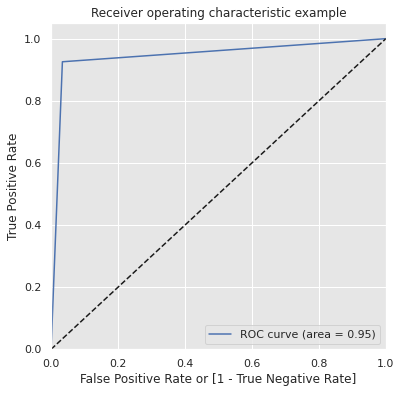

Accuracy on Test Dataset:  0.9661060590101003
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.93      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Confusion Matrix on Test Dataset:
 [[82410  2885]
 [   11   137]]


In [81]:
# Evaluation of model performance on Test subset
modelMetrics_test(rfc_adasyn, threshold_train_val)

### Inferences

| Model                | Train Dataset       | Hyperparameters              | Train AUC   | Threshold | Test AUC
| :-------------       | :-------------      | :----------:                 | -----------: |-----------: |-----------: |
|  Random Forest |  Imbalanced         | Default                      | 100%   | 0.530 | 90.87%   | 
|  Random Forest |  Imbalanced         | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 350, 'n_estimators': 150}  | 98.89%   | 0.002 | 91.19% |
|  Random Forest |  Random Oversampler | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 300, 'min_samples_split': 400, 'n_estimators': 200}  | 99.99%   | 0.612 | 93.52% |
|  Random Forest |  SMOTE              | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}  | 99.67%   | 0.374 | 93.4% |
|  Random Forest | Border line SMOTE   | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 200, 'min_samples_split': 300, 'n_estimators': 100}  | 99.98%   | 0.543 | 93,93% |
|  Random Forest |  ADASYN             | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 200} | 99.59%   | 0.462 | 94.86% |

### Utility functions for Decision Tree

In [78]:
def dt_max_depth(X_train, y_train):
    # parameters to build the model on
    parameters = {'max_depth': range(1, 10, 2)}

    # instantiate the model
    dtree = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100)

    # fit tree on training data
    tree = GridSearchCV(dtree, parameters, 
                        cv=StratifiedKFold(5).split(X_train, y_train), 
                       scoring="roc_auc", return_train_score=True)
    tree.fit(X_train, y_train)
    
    scores = tree.cv_results_
  
    fig = plt.figure(figsize=(25,20))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    # plotting roc_auc with min_samples_split
    plt.figure()
    plt.plot(scores["param_max_depth"],scores["mean_train_score"], label="Training roc_auc")
    plt.plot(scores["param_max_depth"],scores["mean_test_score"], label="Test roc_auc")
    plt.xlabel("max_depth",fontsize=12,family = "Comic Sans MS")
    plt.ylabel("roc_auc", fontsize=12,family = "Comic Sans MS")
    plt.legend()
    plt.show()

In [ ]:
def dt_min_samples_leaf(X_train, y_train):
    # parameters to build the model on
    parameters = {'min_samples_leaf': range(5, 200, 40)}

    # instantiate the model
    dtree = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100)

    # fit tree on training data
    tree = GridSearchCV(dtree, parameters, 
                        cv=StratifiedKFold(5).split(X_train, y_train), 
                       scoring="roc_auc", return_train_score=True)
    tree.fit(X_train, y_train)
    
    scores = tree.cv_results_
    
    fig = plt.figure(figsize=(25,20))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    # plotting roc_auc with min_samples_split
    plt.figure()
    plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"], label="Training roc_auc")
    plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"], label="Test roc_auc")
    plt.xlabel("min_samples_leaf",fontsize=12,family = "Comic Sans MS")
    plt.ylabel("roc_auc", fontsize=12,family = "Comic Sans MS")
    plt.legend()
    plt.show()


In [ ]:
def dt_min_samples_split(X_train, y_train):
    # parameters to build the model on
    parameters = {'min_samples_split': range(5, 200, 40)}

    # instantiate the model
    dtree = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100)

    # fit tree on training data
    tree = GridSearchCV(dtree, parameters, 
                        cv=StratifiedKFold(5).split(X_train, y_train), 
                       scoring="roc_auc", return_train_score=True)
    tree.fit(X_train, y_train)
    
    scores = tree.cv_results_
    
    fig = plt.figure(figsize=(25,20))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    # plotting roc_auc with min_samples_split
    plt.figure()
    plt.plot(scores["param_min_samples_split"],scores["mean_train_score"], label="Training roc_auc")
    plt.plot(scores["param_min_samples_split"],scores["mean_test_score"], label="Test roc_auc")
    plt.xlabel("min_samples_split",fontsize=12,family = "Comic Sans MS")
    plt.ylabel("roc_auc", fontsize=12,family = "Comic Sans MS")
    plt.legend()
    plt.show()


### Decision Tree on imbalanced data set

<Figure size 1800x1440 with 0 Axes>

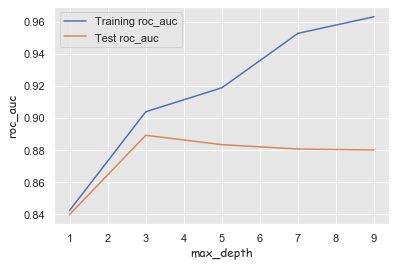

In [ ]:
dt_max_depth(X_train, y_train)

<Figure size 1800x1440 with 0 Axes>

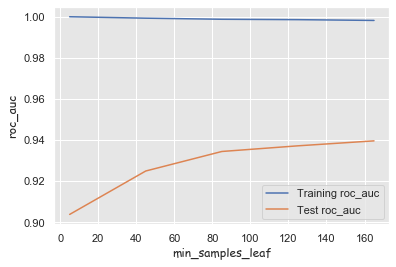

In [ ]:
dt_min_samples_leaf(X_train, y_train)

<Figure size 1800x1440 with 0 Axes>

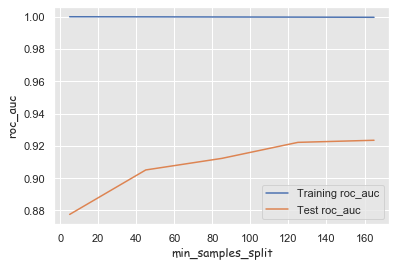

In [ ]:
dt_min_samples_split(X_train, y_train)

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': [3,6],
    'min_samples_leaf': range(80, 100),
    'min_samples_split': range(50, 120),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train, y_train), 
                       scoring="roc_auc", return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# printing the optimal score and hyperparameters
print("best score", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

In [55]:
# model with optimal hyperparameters
dt_imbal = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=80,
                                  min_samples_split=50)
dt_imbal.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=80,
                       min_samples_split=50, random_state=100)

Train AUC: 94.89%
Train ROC Curve Threshold: 0.002


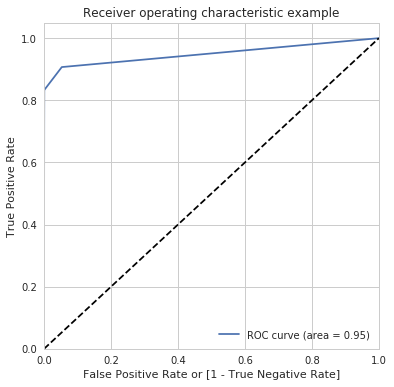

Computing Predictions based on threshold value of  0.0024323798404358825  and then computing below metrics

Train Accuracy:  0.9982845448526314
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.50      0.83      0.63       344

    accuracy                           1.00    199364
   macro avg       0.75      0.92      0.81    199364
weighted avg       1.00      1.00      1.00    199364

Train Confusion Matrix:
 [[198735    285]
 [    57    287]]


In [56]:
# Evaluation of model performance on Train subset
threshold_train_val_dt = modelMetrics_train(dt_imbal, X_train, y_train)

Test AUC: 93.13%


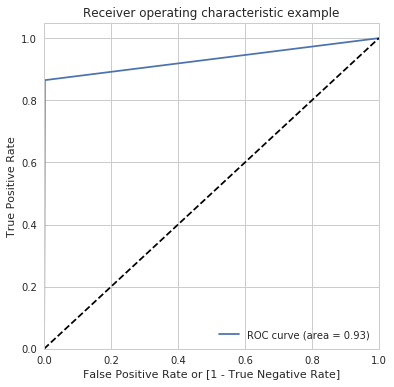

Accuracy on Test Dataset:  0.9974602951675386
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.39      0.86      0.54       148

    accuracy                           1.00     85443
   macro avg       0.70      0.93      0.77     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85098   197]
 [   20   128]]


In [57]:
# Evaluation of model performance on Test subset
modelMetrics_test(dt_imbal, threshold_train_val_dt)

### Decision Tree on balanced data set using Random Oversampling

In [58]:
# Running the Decision Tree with default parameters.
dt_bal_ros = DecisionTreeClassifier(max_depth=5)
dt_bal_ros.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(max_depth=5)

Train AUC: 99.03%
Train ROC Curve Threshold: 0.779


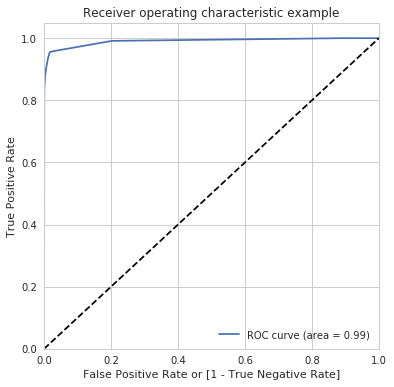

Computing Predictions based on threshold value of  0.7786394859295369  and then computing below metrics

Train Accuracy:  0.9627977087729876
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96    199020
           1       0.99      0.94      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040

Train Confusion Matrix:
 [[196594   2426]
 [ 12382 186638]]


In [59]:
threshold_train_val = modelMetrics_train(dt_bal_ros, X_train_ros, y_train_ros)

Test AUC: 88.85%


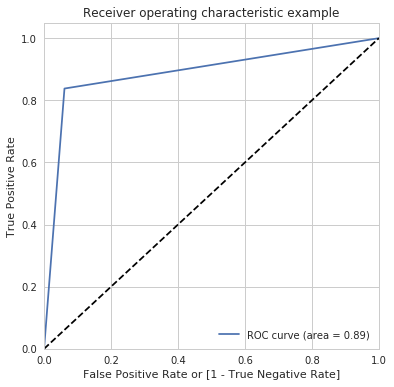

Accuracy on Test Dataset:  0.9389066395140621
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85295
           1       0.02      0.84      0.05       148

    accuracy                           0.94     85443
   macro avg       0.51      0.89      0.51     85443
weighted avg       1.00      0.94      0.97     85443

Confusion Matrix on Test Dataset:
 [[80099  5196]
 [   24   124]]


In [60]:
# Evaluation of model performance on Test subset
modelMetrics_test(dt_bal_ros, threshold_train_val)

<Figure size 1800x1440 with 0 Axes>

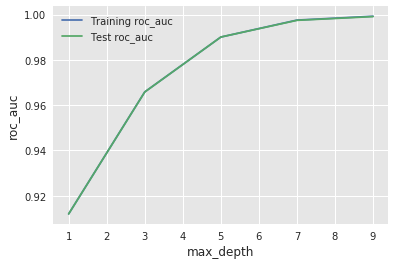

In [79]:
dt_max_depth(X_train_ros, y_train_ros)

In [ ]:
dt_min_samples_leaf(X_train_ros, y_train_ros)

In [ ]:
dt_min_samples_split(X_train_ros, y_train_ros)

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': [3,6],
    'min_samples_leaf': range(40, 120, 40),
    'min_samples_split': range(50, 100, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_ros, y_train_ros), 
                       scoring="roc_auc", return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

In [ ]:
# printing the optimal score and hyperparameters
print("Best score", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

In [ ]:
# model with optimal hyperparameters
clf_gini_ros = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=40,
                                  min_samples_split=50)
clf_gini_ros.fit(X_train_ros, y_train_ros)

In [ ]:
threshold_train_val = modelMetrics_train(clf_gini_ros, X_train_ros, y_train_ros)

In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(clf_gini_ros, threshold_train_val)

### Decision Tree on balanced data set using SMOTE

In [ ]:
# Running the Decision Tree with default parameters.
dt_bal_sm = DecisionTreeClassifier(max_depth=5)
dt_bal_sm.fit(X_train_sm,y_train_sm)

In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(dt_bal_sm, X_train_sm, y_train_sm)

In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(dt_bal_sm, threshold_train_val)

In [ ]:
dt_max_depth(X_train_sm, y_train_sm)

In [ ]:
dt_min_samples_leaf(X_train_sm, y_train_sm)

In [ ]:
dt_min_samples_split(X_train_sm, y_train_sm)

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': [5,7],
    'min_samples_leaf': range(40, 100, 20),
    'min_samples_split': range(50, 120, 40),
    'criterion': ["entropy", "gini"]
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_sm, y_train_sm), 
                       scoring="roc_auc", return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_sm,y_train_sm)

In [ ]:
# printing the optimal score and hyperparameters
print("Best score", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

In [ ]:
# model with optimal hyperparameters
clf_gini_smote = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=7, 
                                  min_samples_leaf=40,
                                  min_samples_split=90)
clf_gini_smote.fit(X_train_sm, y_train_sm)

In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(clf_gini_smote, X_train_sm, y_train_sm)

In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(clf_gini_smote, threshold_train_val)

### Decision Tree on balanced data set using ADASYN 

In [ ]:
dt_max_depth(X_train_adasyn, y_train_adasyn)

In [ ]:
dt_min_samples_leaf(X_train_adasyn, y_train_adasyn)

In [ ]:
dt_min_samples_split(X_train_adasyn, y_train_adasyn)

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': [3,6],
    'min_samples_leaf': range(40, 120, 40),
    'min_samples_split': range(50, 100, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_adasyn, y_train_adasyn), 
                       scoring="roc_auc", return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
# printing the optimal score and hyperparameters
print("best score", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

In [ ]:
# model with optimal hyperparameters
clf_gini_adasyn = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf= 40,
                                  min_samples_split=50)
clf_gini_adasyn.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(clf_gini_adasyn, X_train_adasyn, y_train_adasyn)

In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(clf_gini_adasyn, threshold_train_val)

### Decision Tree on balanced data set using Borderline SMOTE

In [ ]:
dt_max_depth(X_train_blsm, y_train_blsm)

In [ ]:
dt_min_samples_leaf(X_train_blsm, y_train_blsm)

In [ ]:
dt_min_samples_split(X_train_blsm, y_train_blsm)

In [ ]:
# printing the optimal score and hyperparameters
print("best score", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

In [ ]:
# model with optimal hyperparameters
clf_gini_blsm = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=70,
                                  min_samples_split=100)
clf_gini_blsm.fit(X_train_blsm, y_train_blsm)

In [ ]:
threshold_train_val_blsm = modelMetrics_train(clf_gini_blsm, X_train_blsm, y_train_blsm)

In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(clf_gini_blsm, threshold_train_val_blsm)

| Model                | Train Dataset       | Hyperparameters              | Train AUC   | Threshold | Test AUC | 
| :-------------       | :-------------      | :----------:                 | -----------: |-----------: |-----------: |
|  Decision Tree |  Imbalanced         | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 80, 'min_samples_split': 50} | 94.89%  | 0.002 | 93.13%   |
|  Decision Tree |  Random Oversampler | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50}  | 99.74%   | 0.564 | 87.91%   |
|  Decision Tree |  SMOTE              | {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 90}  | 99.55%   | 0.547 | 92.06%   |
|  Decision Tree |  Border line SMOTE  | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 70, 'min_samples_split': 100}  | 99.88%   | 0.500 | 93.34%   |
|  Decision Tree |  ADASYN             | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50}| 97.77%   | 0.560 | 92.55%   |

### XG Boost Model on imbalanced data set with tuned Hyperparameter Paramaters

In [52]:
# fit model on training data with default hyperparameters
xgb_dt = XGBClassifier(random_state=0)
xgb_dt.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.872


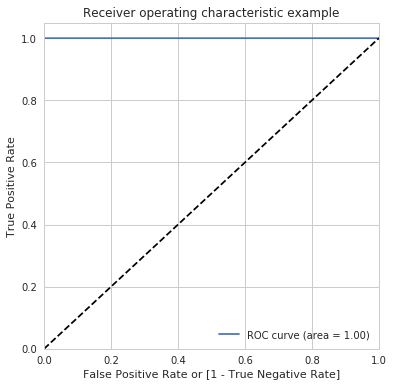

Computing Predictions based on threshold value of  0.8720196  and then computing below metrics

Train Accuracy:  0.9999949840492767
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

Train Confusion Matrix:
 [[199020      0]
 [     1    343]]


In [53]:
# Evaluation of model performance on Train subset
threshold_train_val_xgb = modelMetrics_train(xgb_dt, X_train, y_train)

Test AUC: 89.85%


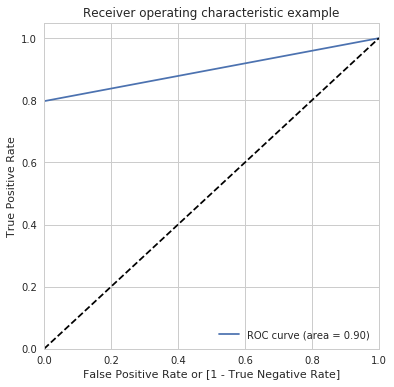

Accuracy on Test Dataset:  0.9994499256814484
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85278    17]
 [   30   118]]


In [54]:
# Evaluation of model performance on Test subset
modelMetrics_test(xgb_dt, threshold_train_val_xgb)

XG Boost Model - Hyperparameter Tuning

Determining n_estimators

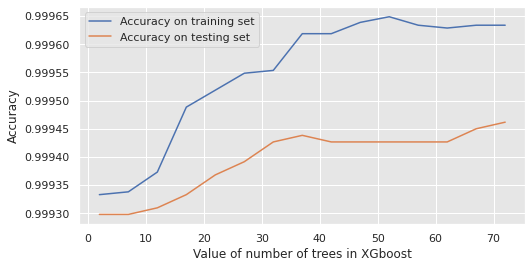

In [119]:
tree_range = range(2, 75, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.figure(figsize=(8,4))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [55]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
# folds = 3
kfolds = StratifiedKFold(5)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=27)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train, y_train),
                        verbose = 1,
                        return_train_score=True)

In [56]:
# fit the model
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fa3cc2e73b8>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=27, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
      

In [122]:
# printing the optimal score and hyperparameters
print('Best score ',model_cv.best_score_,'using',model_cv.best_params_)

Best score  0.9703619255023102 using {'learning_rate': 0.6, 'subsample': 0.9}


In [57]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [58]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [59]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':27,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb = XGBClassifier(params = params)
xgb.fit(X_train, y_train)

[17:08:12] WARNING: ../src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 27,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.872


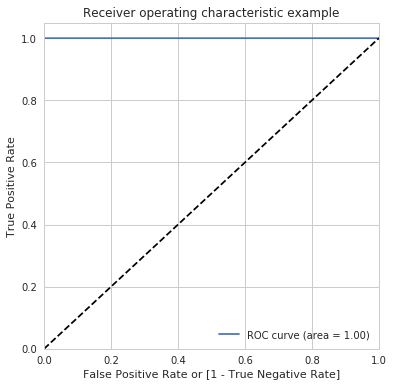

Computing Predictions based on threshold value of  0.8720196  and then computing below metrics

Train Accuracy:  0.9999949840492767
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

Train Confusion Matrix:
 [[199020      0]
 [     1    343]]


In [60]:
# Evaluation of model performance on Train subset
threshold_train_val_xgb_h = modelMetrics_train(xgb, X_train, y_train)

Test AUC: 89.85%


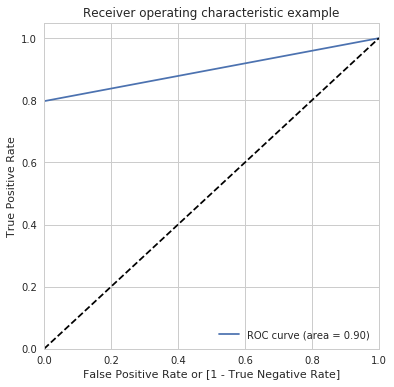

Accuracy on Test Dataset:  0.9994499256814484
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85278    17]
 [   30   118]]


In [61]:
# Evaluation of model performance on Test subset
modelMetrics_test(xgb, threshold_train_val_xgb_h)

In [62]:
# feature importance
importance = dict(zip(X_train.columns, xgb.feature_importances_))

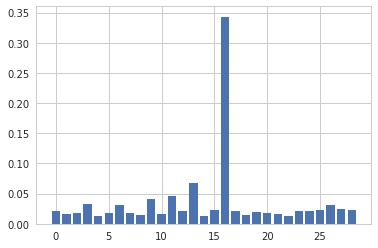

In [63]:
# plot
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

### Utility functions

In [92]:
def xgb_n_estimators(X_train, y_train, X_test, y_test):
    tree_range = range(2, 150, 15)
    score1=[]
    score2=[]
    for tree in tree_range:
        xgb=XGBClassifier(n_estimators=tree)
        xgb.fit(X_train,y_train)
        score1.append(xgb.score(X_train,y_train))
        score2.append(xgb.score(X_test,y_test))

    %matplotlib inline
    plt.figure(figsize=(8,4))
    plt.plot(tree_range,score1,label= 'Accuracy on training set')
    plt.plot(tree_range,score2,label= 'Accuracy on testing set')
    plt.xlabel('Value of number of trees in XGboost')
    plt.ylabel('Accuracy')
    plt.legend()

### XGboost Model on balanced data set using Borderline Random Oversampling


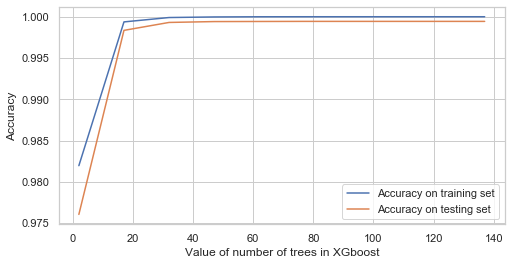

In [52]:
xgb_n_estimators(X_train_ros, y_train_ros, X_test, y_test)

In [64]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
# folds = 3
kfolds = StratifiedKFold(5)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=24)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_ros, y_train_ros),
                        verbose = 1,
                        return_train_score=True)

In [65]:
# fit the model
model_cv.fit(X_train_ros, y_train_ros) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.7min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fa37c926af0>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=24, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
      

In [66]:
# printing the optimal  score and hyperparameters
print('Best score ',model_cv.best_score_,'using',model_cv.best_params_)

Best score  0.9998315565485025 using {'learning_rate': 0.6, 'subsample': 0.6}


In [67]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [68]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')

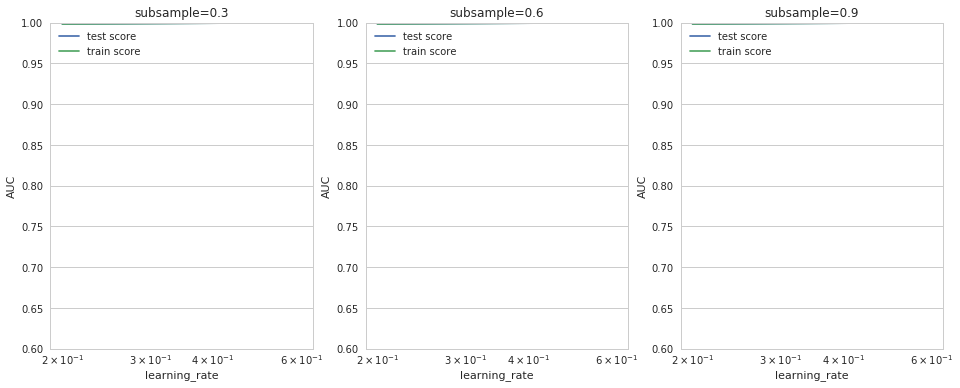

In [69]:
# # plotting
plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [70]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':27,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_ros = XGBClassifier(params = params)
xgb_model_ros.fit(X_train_ros, y_train_ros)

[17:23:18] WARNING: ../src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 27,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Train AUC: 100.00%
Train ROC Curve Threshold: 1.000


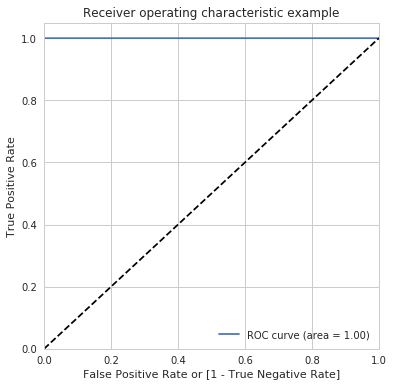

Computing Predictions based on threshold value of  0.99969697  and then computing below metrics

Train Accuracy:  0.9986157170133655
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Train Confusion Matrix:
 [[199020      0]
 [   551 198469]]


In [71]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(xgb_model_ros, X_train_ros, y_train_ros)

Test AUC: 88.84%


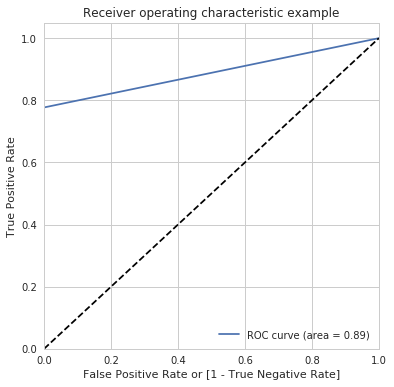

Accuracy on Test Dataset:  0.9994616293903538
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85282    13]
 [   33   115]]


In [72]:
# Evaluation of model performance on Test subset
modelMetrics_test(xgb_model_ros, threshold_train_val)

### XGboost on balanced data set using SMOTE

In [73]:
# fit model on training data with default hyperparameters
xgb_smote=XGBClassifier(random_state=0)
xgb_smote.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.875


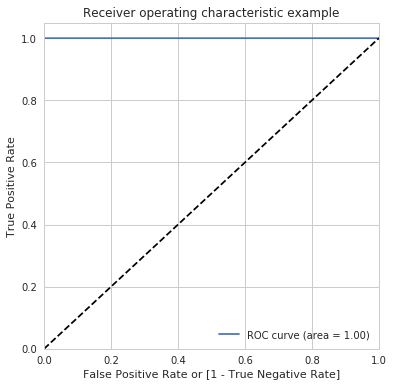

Computing Predictions based on threshold value of  0.8751759  and then computing below metrics

Train Accuracy:  0.9999974876896794
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Train Confusion Matrix:
 [[199020      0]
 [     1 199019]]


In [74]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(xgb_smote,X_train_sm, y_train_sm)

In [ ]:
xgb_n_estimators(X_train_sm, y_train_sm, X_test, y_test)

In [75]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
# folds = 3
kfolds = StratifiedKFold(5)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=27)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_sm, y_train_sm),
                        verbose = 1,
                        return_train_score=True)

In [76]:
# fit the model
model_cv.fit(X_train_sm, y_train_sm) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.9min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fa38c750ba0>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=27, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
      

In [77]:
# printing the optimal  score and hyperparameters
print('Best score ',model_cv.best_score_,'using',model_cv.best_params_)

Best score  0.9993917134593616 using {'learning_rate': 0.6, 'subsample': 0.3}


In [78]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [79]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')

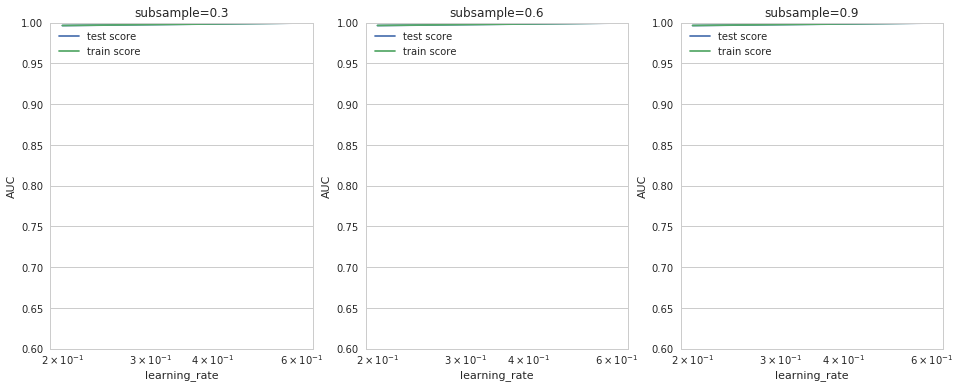

In [80]:
# # plotting
plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [81]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':27,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_smote = XGBClassifier(params = params)
xgb_model_smote.fit(X_train_sm, y_train_sm)

[17:31:39] WARNING: ../src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 27,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.875


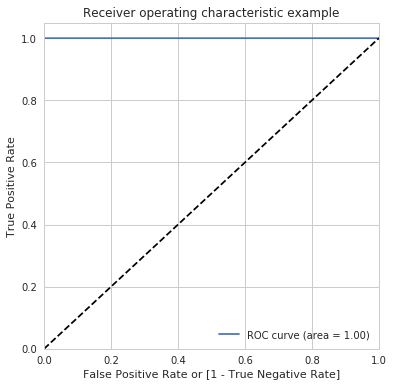

Computing Predictions based on threshold value of  0.8751759  and then computing below metrics

Train Accuracy:  0.9999974876896794
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Train Confusion Matrix:
 [[199020      0]
 [     1 199019]]


In [82]:
# Evaluation of model performance on Train subset
threshold_train_val_xgb = modelMetrics_train(xgb_model_smote, X_train_sm, y_train_sm)

Test AUC: 90.19%


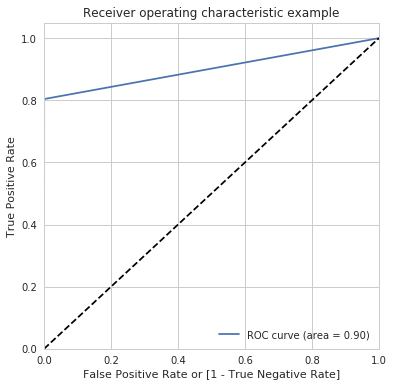

Accuracy on Test Dataset:  0.999403110845827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.80      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85273    22]
 [   29   119]]


In [83]:
# Evaluation of model performance on Test subset
modelMetrics_test(xgb_model_smote, threshold_train_val_xgb)

### Xgboost on balanced data set using Borderline SMOTE

In [84]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
# folds = 3
kfolds = StratifiedKFold(5)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=27)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_blsm, y_train_blsm),
                        verbose = 1,
                        return_train_score=True)

In [85]:
# fit the model
model_cv.fit(X_train_blsm, y_train_blsm) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.1min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fa3820a05c8>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=27, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
      

In [86]:
# printing the optimal score and hyperparameters
print('Best score ',model_cv.best_score_,'using',model_cv.best_params_)

Best score  0.9998750922152453 using {'learning_rate': 0.6, 'subsample': 0.6}


In [87]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [88]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [89]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':27,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb = XGBClassifier(params = params)
xgb.fit(X_train_blsm, y_train_blsm)

[17:39:03] WARNING: ../src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 27,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.758


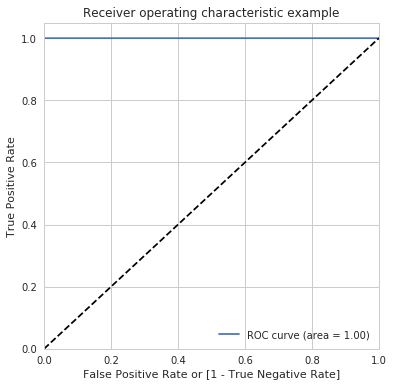

Computing Predictions based on threshold value of  0.7584244  and then computing below metrics

Train Accuracy:  0.9999974876896794
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Train Confusion Matrix:
 [[199020      0]
 [     1 199019]]


In [90]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(xgb, X_train_blsm, y_train_blsm)

Test AUC: 91.87%


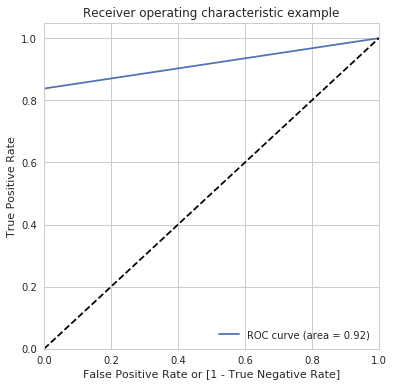

Accuracy on Test Dataset:  0.9993797034280163
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.84      0.82       148

    accuracy                           1.00     85443
   macro avg       0.91      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85266    29]
 [   24   124]]


In [91]:
# Evaluation of model performance on Test subset
modelMetrics_test(xgb, threshold_train_val)

### XGboost Model on balanced data set using Borderline ADASYN 

In [ ]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
kfolds = StratifiedKFold(5)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=27)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_adasyn, y_train_adasyn),
                        verbose = 1,
                        return_train_score=True)

In [ ]:
# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
# printing the optimal  score and hyperparameters
print('Best score ',model_cv.best_score_,'using',model_cv.best_params_)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [ ]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':27,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_adasyn = XGBClassifier(params = params)
xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
# Evaluation of model performance on Train subset
threshold_train_val = modelMetrics_train(xgb_model_adasyn, X_train_adasyn, y_train_adasyn)

In [ ]:
# Evaluation of model performance on Test subset
modelMetrics_test(xgb_model_adasyn, threshold_train_val)

In [ ]:
X_train_blsm, y_train_blsm = borderlinesmote.fit_sample(X_train,y_train)

| Model                | Train Dataset       | Hyperparameters              | Train AUC  | Threshold | Test AUC
| :-------------       | :-------------      | :----------:                 | -----------: | -----------: | -----------: |
|  XG Boost |  Imbalanced         | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}  | 100.00%   | 0.872 |89.85%   |
|  XG Boost |  Random Oversampler | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.6}  | 100.00%   | 1.000 |88.84%   |
|  XG Boost |  SMOTE              | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}   | 100.00%   | 0.875 |90.19%  |
|  XG Boost |  Border line SMOTE  | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.6}   | 100.00%   | 0.758 |91.87%  |
|  XG Boost |  ADASYN             | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.3} | 100.00%   | 0.910 |90.19%   |

### Summary

| Model                | Train Dataset       | Hyperparameters              | Train AUC   | Threshold | Test AUC |
| :-------------       | :-------------      | :----------:                 | -----------: | -----------: | -----------: |
|  Logistic Regression |  Imbalanced         | Default                      | 97.89%   | 0.003 | 93.78% |
|  Logistic Regression |  Imbalanced         | {'C': 0.01, 'penalty': 'l2'} | 98.12%   | 0.007 | 93.87% |
|  Logistic Regression |  Random Oversampler | {'C': 100, 'penalty': 'l2'}  | 98.54%   | 0.471 | 93.98% |
|  Logistic Regression |  SMOTE              | {'C': 100, 'penalty': 'l2'}  | 98.83%   | 0.454 | 93.86% |
|  Logistic Regression |  Border line SMOTE  | {'C': 10, 'penalty': 'l2'}  | 99.90%   | 0.417 | 94.12% |
|  Logistic Regression |  ADASYN             | {'C': 100, 'penalty': 'l2'}  | 96.23%   | 0.325 | 92.65% |
| K-Nearest Neighbours |  Imbalanced         | Default  | 99.9%   | 0.200 | 88.84% |
|  Decision Tree |  Imbalanced         | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 80, 'min_samples_split': 50} | 94.89%  | 0.002 | 93.13%   |
|  Decision Tree |  Random Oversampler | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50}  | 99.74%   | 0.564 | 87.91%   |
|  Decision Tree |  SMOTE              | {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 90}  | 99.55%   | 0.547 | 92.06%   |
|  Decision Tree |  Border line SMOTE  | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 70, 'min_samples_split': 100}  | 99.88%   | 0.500 | 93.34%   |
|  Decision Tree |  ADASYN             | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50}| 97.77%   | 0.560 | 92.55%   |
|  Random Forest |  Imbalanced         | Default                      | 100%   | 0.530 | 90.87%   | 
|  Random Forest |  Imbalanced         | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 350, 'n_estimators': 150}  | 98.89%   | 0.002 | 91.19% |
|  Random Forest |  Random Oversampler | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 300, 'min_samples_split': 400, 'n_estimators': 200}  | 99.99%   | 0.612 | 93.52% |
|  Random Forest |  SMOTE              | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}  | 99.67%   | 0.374 | 93.96% |
|  Random Forest | Border line SMOTE   | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 200, 'min_samples_split': 300, 'n_estimators': 100}  | 99.98%   | 0.543 | 93,93% |
|  Random Forest |  ADASYN             | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 200} | 99.59%   | 0.462 | 94.86% |
|  XG Boost |  Imbalanced         | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}  | 100.00%   | 0.872 |89.85%   |
|  XG Boost |  Random Oversampler | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.6}  | 100.00%   | 1.000 |88.84%   |
|  XG Boost |  SMOTE              | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}   | 100.00%   | 0.875 |90.19%  |
|  XG Boost |  Border line SMOTE  | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.6}   | 100.00%   | 0.758 |91.87%  |
|  XG Boost |  ADASYN             | {'max_depth':3,'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.3} | 100.00%   | 0.910 |90.19%   |

### Important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in rfc_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc_adasyn.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(rfc_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 16]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Cost Benefit Analysis

In [85]:
# predictions on test subset
y_pred = rfc_adasyn.predict(X_test)

In [86]:
# computing confusion matrix
cm=confusion_matrix(y_test, y_pred)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
print(cm)

[[83328  1967]
 [   13   135]]


In [87]:
# create predictions dataframe. Column 1 is Class --> Actual
test_predictions = pd.DataFrame(y_test)
test_predictions.rename(columns={'Class':'Actual'}, inplace=True)
test_predictions.head()

Actual
278726       0
150912       0
64291        0
138450       0
62003        0

In [88]:
# add predicted columns with prediction values
test_predictions['Predicted'] = y_pred
test_predictions.head()

Actual  Predicted
278726       0          0
150912       0          0
64291        0          0
138450       0          0
62003        0          0

In [89]:
# merge with transaction amount from the original dataframe by merging based on index values
test_predictions = test_predictions.merge(pd.DataFrame(credit_card_data_org['Amount']), left_index=True, right_index=True)
test_predictions.head()

Actual  Predicted  Amount
278726       0          0   13.33
150912       0          0    0.77
64291        0          0   12.31
138450       0          0   25.00
62003        0          0    3.91

In [90]:
# Computing transaction cost for all True Positive cases
trnx_cost_TP = test_predictions.query('Actual==1 & Predicted==1')['Amount'].sum()
trnx_cost_TP

18637.96

In [91]:
# Computing transaction cost for all False Negative cases
trnx_cost_FN = test_predictions.query('Actual==1 & Predicted==0')['Amount'].sum()
trnx_cost_FN

3651.5499999999997

In [94]:
# Assuming 1 units as the cost of each verification call
call_verification_cost = (TP + FP) * 1
call_verification_cost

2102

In [95]:
total_savings = trnx_cost_TP - (trnx_cost_FN + call_verification_cost)
print("Total Savings (Cost Benefit Analysis) is ", round(total_savings,2), "amount units on Test Subset")

Total Savings (Cost Benefit Analysis) is  12884.41 amount units on Test Subset
